In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

In [2]:
sns.set(style="whitegrid", color_codes=True)

#%matplotlib inline

dataset = pd.read_csv('CGPA_Data_Student_Final_v10(Exp2)800.csv')

In [3]:
dataset=pd.DataFrame(dataset)
dataset.head()

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Matric-Marks,Intermediate,Board2,Obtained2,Total2,Intermediate-Marks,Att_CreditHrs-Semester,Earn_CreditHrs-Semester,SGPA-Semester,CGPA-Semester
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,85.142857,HSSC(I+II),BISE FSD,792,1100,72.000000,13.0,13.0,1.0,1.08
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,73.142857,HSSC(I+II),BISE FSD,678,1100,61.636364,17.0,13.0,1.0,1.96
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,86.190476,HSSC(I+II),BISE Gujranwala,879,1100,79.909091,17.0,17.0,1.0,2.49
3,f14,No,Single,Average,Average,Private,Private,Urban,Urban,Mother,...,83.619048,HSSC(I+II),BISE FSD,674,1100,61.272727,17.0,11.0,1.0,1.77
4,f15,No,Single,Good,Good,Private,Private,Urban,Urban,Father,...,79.904762,HSSC(I+II),Faislabad,787,1100,71.545455,17.0,11.0,1.0,1.47


In [4]:
print("Data shape: ",dataset.shape)
print("Data columns: ",dataset.columns)

Data shape:  (800, 63)
Data columns:  Index(['Batch', 'SM', 'MS', 'ES', 'EC', 'TS', 'TC', 'GS', 'GC', 'GU', 'EG',
       'OG', 'GH', 'SS', 'H/D', 'Semester', 'Hostelite-S', 'SM-S', 'MS-S',
       'OnBus-S', 'OnCar-S', 'OnBike-S', 'OnLocalBus-S', 'PI-S', 'HI-S',
       'SG-S', 'MF-S', 'HF-S', 'RA-S', 'SSField-S', 'SInE-S', 'TS-S', 'TE-S',
       'HS-S', 'SD-S', 'SW-S', 'SQ-S', 'MA-S', 'BL-S', 'BU-S', 'IF-S',
       'Student_Campus', 'City', 'Student_Lat', 'Std_Long',
       'Student_Home_Uni_Distance(km)', 'Status', 'Gender', 'DOB', 'Matic',
       'Board', 'Obtained', 'Total', 'Matric-Marks', 'Intermediate', 'Board2',
       'Obtained2', 'Total2', 'Intermediate-Marks', 'Att_CreditHrs-Semester',
       'Earn_CreditHrs-Semester', 'SGPA-Semester', 'CGPA-Semester'],
      dtype='object')


In [5]:
dataset.isnull().values.any()

True

<AxesSubplot:>

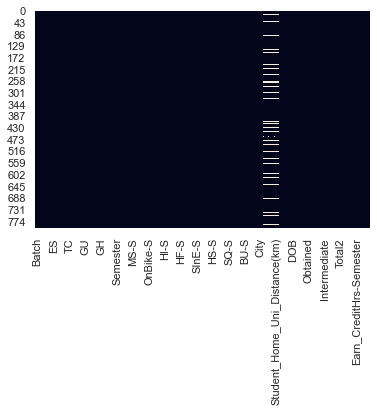

In [6]:
sns.heatmap(dataset.isnull(), cbar=False)

# Preprocessing

In [7]:
dataset = dataset[dataset['CGPA-Semester'].notnull()]
dataset.shape

(799, 63)

In [8]:
#Data binding for matric and intermediate marks
bins = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
dataset['Matric-Marks-Bin'] = pd.cut(dataset['Matric-Marks'], bins=bins, labels=labels)
dataset['Intermediate-Marks-Bin'] = pd.cut(dataset['Intermediate-Marks'], bins=bins, labels=labels)
dataset.head(10)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Board2,Obtained2,Total2,Intermediate-Marks,Att_CreditHrs-Semester,Earn_CreditHrs-Semester,SGPA-Semester,CGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,BISE FSD,792,1100,72.000000,13.0,13.0,1.0,1.08,85-90,70-75
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,BISE FSD,678,1100,61.636364,17.0,13.0,1.0,1.96,70-75,60-65
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,BISE Gujranwala,879,1100,79.909091,17.0,17.0,1.0,2.49,85-90,75-80
3,f14,No,Single,Average,Average,Private,Private,Urban,Urban,Mother,...,BISE FSD,674,1100,61.272727,17.0,11.0,1.0,1.77,80-85,60-65
4,f15,No,Single,Good,Good,Private,Private,Urban,Urban,Father,...,Faislabad,787,1100,71.545455,17.0,11.0,1.0,1.47,75-80,70-75
5,f15,Yes,Single,Excellent,Good,Private,Public,Urban,Urban,Others,...,BISE Lahore,616,1100,56.000000,17.0,11.0,1.0,1.35,75-80,55-60
6,f15,Yes,Single,Excellent,Excellent,Private,Public,Urban,Urban,Father,...,Lahore,781,1100,71.000000,17.0,11.0,1.0,1.37,85-90,70-75
7,f16,No,Married,Good,Average,Private,Private,Urban,Urban,Father,...,BISE,867,1100,78.818182,17.0,17.0,1.0,3.43,85-90,75-80
8,f16,No,Single,Excellent,Good,Private,Private,Urban,Urban,Father,...,BISE,761,1100,69.181818,17.0,14.0,1.0,1.29,85-90,65-70
9,f16,No,Single,Good,Good,Public,Public,Urban,Urban,Father,...,Cambridge,775,1100,70.454545,17.0,14.0,1.0,2.33,75-80,70-75


In [9]:
#Data binding for attempted and earned credit hours
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40 ,45, 50, 55, 60, 65, 70]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']
dataset['Att_CreditHrs-Semester-Bin'] = pd.cut(dataset['Att_CreditHrs-Semester'], bins=bins, labels=labels)
dataset['Earn_CreditHrs-Semester-Bin'] = pd.cut(dataset['Earn_CreditHrs-Semester'], bins=bins, labels=labels)
dataset.head(10)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Total2,Intermediate-Marks,Att_CreditHrs-Semester,Earn_CreditHrs-Semester,SGPA-Semester,CGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,1100,72.000000,13.0,13.0,1.0,1.08,85-90,70-75,10-15,10-15
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,1100,61.636364,17.0,13.0,1.0,1.96,70-75,60-65,15-20,10-15
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,1100,79.909091,17.0,17.0,1.0,2.49,85-90,75-80,15-20,15-20
3,f14,No,Single,Average,Average,Private,Private,Urban,Urban,Mother,...,1100,61.272727,17.0,11.0,1.0,1.77,80-85,60-65,15-20,10-15
4,f15,No,Single,Good,Good,Private,Private,Urban,Urban,Father,...,1100,71.545455,17.0,11.0,1.0,1.47,75-80,70-75,15-20,10-15
5,f15,Yes,Single,Excellent,Good,Private,Public,Urban,Urban,Others,...,1100,56.000000,17.0,11.0,1.0,1.35,75-80,55-60,15-20,10-15
6,f15,Yes,Single,Excellent,Excellent,Private,Public,Urban,Urban,Father,...,1100,71.000000,17.0,11.0,1.0,1.37,85-90,70-75,15-20,10-15
7,f16,No,Married,Good,Average,Private,Private,Urban,Urban,Father,...,1100,78.818182,17.0,17.0,1.0,3.43,85-90,75-80,15-20,15-20
8,f16,No,Single,Excellent,Good,Private,Private,Urban,Urban,Father,...,1100,69.181818,17.0,14.0,1.0,1.29,85-90,65-70,15-20,10-15
9,f16,No,Single,Good,Good,Public,Public,Urban,Urban,Father,...,1100,70.454545,17.0,14.0,1.0,2.33,75-80,70-75,15-20,10-15


In [10]:
dataset['DOB'] = pd.to_datetime(dataset['DOB']).dt.strftime('%d/%m/%Y')

In [11]:
#DOB to current Age
from datetime import datetime
from datetime import date

def calculate_age(born):
        born = datetime.strptime(born, '%d/%m/%Y').date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

dataset['Age'] = dataset['DOB'].apply(calculate_age)
    
dataset.head(10)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Intermediate-Marks,Att_CreditHrs-Semester,Earn_CreditHrs-Semester,SGPA-Semester,CGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin,Age
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,72.000000,13.0,13.0,1.0,1.08,85-90,70-75,10-15,10-15,23
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,61.636364,17.0,13.0,1.0,1.96,70-75,60-65,15-20,10-15,26
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,79.909091,17.0,17.0,1.0,2.49,85-90,75-80,15-20,15-20,27
3,f14,No,Single,Average,Average,Private,Private,Urban,Urban,Mother,...,61.272727,17.0,11.0,1.0,1.77,80-85,60-65,15-20,10-15,25
4,f15,No,Single,Good,Good,Private,Private,Urban,Urban,Father,...,71.545455,17.0,11.0,1.0,1.47,75-80,70-75,15-20,10-15,24
5,f15,Yes,Single,Excellent,Good,Private,Public,Urban,Urban,Others,...,56.000000,17.0,11.0,1.0,1.35,75-80,55-60,15-20,10-15,25
6,f15,Yes,Single,Excellent,Excellent,Private,Public,Urban,Urban,Father,...,71.000000,17.0,11.0,1.0,1.37,85-90,70-75,15-20,10-15,22
7,f16,No,Married,Good,Average,Private,Private,Urban,Urban,Father,...,78.818182,17.0,17.0,1.0,3.43,85-90,75-80,15-20,15-20,25
8,f16,No,Single,Excellent,Good,Private,Private,Urban,Urban,Father,...,69.181818,17.0,14.0,1.0,1.29,85-90,65-70,15-20,10-15,22
9,f16,No,Single,Good,Good,Public,Public,Urban,Urban,Father,...,70.454545,17.0,14.0,1.0,2.33,75-80,70-75,15-20,10-15,23


In [12]:
dataset.columns

Index(['Batch', 'SM', 'MS', 'ES', 'EC', 'TS', 'TC', 'GS', 'GC', 'GU', 'EG',
       'OG', 'GH', 'SS', 'H/D', 'Semester', 'Hostelite-S', 'SM-S', 'MS-S',
       'OnBus-S', 'OnCar-S', 'OnBike-S', 'OnLocalBus-S', 'PI-S', 'HI-S',
       'SG-S', 'MF-S', 'HF-S', 'RA-S', 'SSField-S', 'SInE-S', 'TS-S', 'TE-S',
       'HS-S', 'SD-S', 'SW-S', 'SQ-S', 'MA-S', 'BL-S', 'BU-S', 'IF-S',
       'Student_Campus', 'City', 'Student_Lat', 'Std_Long',
       'Student_Home_Uni_Distance(km)', 'Status', 'Gender', 'DOB', 'Matic',
       'Board', 'Obtained', 'Total', 'Matric-Marks', 'Intermediate', 'Board2',
       'Obtained2', 'Total2', 'Intermediate-Marks', 'Att_CreditHrs-Semester',
       'Earn_CreditHrs-Semester', 'SGPA-Semester', 'CGPA-Semester',
       'Matric-Marks-Bin', 'Intermediate-Marks-Bin',
       'Att_CreditHrs-Semester-Bin', 'Earn_CreditHrs-Semester-Bin', 'Age'],
      dtype='object')

In [13]:
#Droped Columns that have been in Data Bins
dataset = dataset.drop(['Matric-Marks', 'Intermediate-Marks', 'DOB', 'Att_CreditHrs-Semester',\
                       'Earn_CreditHrs-Semester'], axis=1)
dataset.head(5)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Board2,Obtained2,Total2,SGPA-Semester,CGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin,Age
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,BISE FSD,792,1100,1.0,1.08,85-90,70-75,10-15,10-15,23
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,BISE FSD,678,1100,1.0,1.96,70-75,60-65,15-20,10-15,26
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,BISE Gujranwala,879,1100,1.0,2.49,85-90,75-80,15-20,15-20,27
3,f14,No,Single,Average,Average,Private,Private,Urban,Urban,Mother,...,BISE FSD,674,1100,1.0,1.77,80-85,60-65,15-20,10-15,25
4,f15,No,Single,Good,Good,Private,Private,Urban,Urban,Father,...,Faislabad,787,1100,1.0,1.47,75-80,70-75,15-20,10-15,24


In [14]:
dataset.dtypes

Batch                            object
SM                               object
MS                               object
ES                               object
EC                               object
                                 ...   
Matric-Marks-Bin               category
Intermediate-Marks-Bin         category
Att_CreditHrs-Semester-Bin     category
Earn_CreditHrs-Semester-Bin    category
Age                               int64
Length: 63, dtype: object

In [15]:
dataset = dataset.astype('str')

In [16]:
dataset.dtypes

Batch                          object
SM                             object
MS                             object
ES                             object
EC                             object
                                ...  
Matric-Marks-Bin               object
Intermediate-Marks-Bin         object
Att_CreditHrs-Semester-Bin     object
Earn_CreditHrs-Semester-Bin    object
Age                            object
Length: 63, dtype: object

In [17]:
dataset['CGPA-Semester'] = dataset['CGPA-Semester'].astype(float)

In [18]:
def f(row):
    if row['CGPA-Semester'] >= 3.00 :
        val = 'Good'
    elif row['CGPA-Semester'] >= 2.00 and row['CGPA-Semester'] < 3.00 :
        val = 'Average'
    else: 
        val = 'Bad' 
    return val

dataset['Class'] = dataset.apply(f, axis=1)
dataset['Class']

0          Bad
1          Bad
2      Average
3          Bad
4          Bad
        ...   
795    Average
796    Average
797    Average
798    Average
799    Average
Name: Class, Length: 799, dtype: object

In [19]:
dataset.head(3)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Obtained2,Total2,SGPA-Semester,CGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin,Age,Class
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,792,1100,1.0,1.08,85-90,70-75,10-15,10-15,23,Bad
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,678,1100,1.0,1.96,70-75,60-65,15-20,10-15,26,Bad
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,879,1100,1.0,2.49,85-90,75-80,15-20,15-20,27,Average


In [20]:
dataset.Class.value_counts()

Average    476
Good       221
Bad        102
Name: Class, dtype: int64

In [21]:
data = dataset.copy()

In [22]:
data.drop('CGPA-Semester', inplace=True, axis=1)
data.head(5)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Board2,Obtained2,Total2,SGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin,Age,Class
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,BISE FSD,792,1100,1.0,85-90,70-75,10-15,10-15,23,Bad
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,BISE FSD,678,1100,1.0,70-75,60-65,15-20,10-15,26,Bad
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,BISE Gujranwala,879,1100,1.0,85-90,75-80,15-20,15-20,27,Average
3,f14,No,Single,Average,Average,Private,Private,Urban,Urban,Mother,...,BISE FSD,674,1100,1.0,80-85,60-65,15-20,10-15,25,Bad
4,f15,No,Single,Good,Good,Private,Private,Urban,Urban,Father,...,Faislabad,787,1100,1.0,75-80,70-75,15-20,10-15,24,Bad


In [23]:
#Manual Encoding (correct code)
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values <= 14:
        print('The number of values  for feature {} : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values  for feature {} : {}'.format(column, nr_values))

The number of values  for feature Batch : 6 -- ['f13' 'f14' 'f15' 'f16' 'f17' 'f18']
The number of values  for feature SM : 2 -- ['No' 'Yes']
The number of values  for feature MS : 2 -- ['Married' 'Single']
The number of values  for feature ES : 4 -- ['Average' 'Bad' 'Excellent' 'Good']
The number of values  for feature EC : 4 -- ['Average' 'Bad' 'Excellent' 'Good']
The number of values  for feature TS : 2 -- ['Private' 'Public']
The number of values  for feature TC : 2 -- ['Private' 'Public']
The number of values  for feature GS : 2 -- ['Rural' 'Urban']
The number of values  for feature GC : 2 -- ['Rural' 'Urban']
The number of values  for feature GU : 3 -- ['Father' 'Mother' 'Others']
The number of values  for feature EG : 5 -- ['12 Years of Study' '14 Years of Study' '16 Years of Study'
 '18 Years of Study' 'More than 18 years of study']
The number of values  for feature OG : 142
The number of values  for feature GH : 2 -- ['Rural' 'Urban']
The number of values  for feature SS : 5 -

In [24]:
data['Board'].value_counts()

Faislabad          208
Lahore             108
Federal             64
Cambridge           64
Gujranwala          36
Sargodha            28
BISE LHR            28
BISE Faisalabad     28
BISE                24
Multan              20
BISE Faislabad      20
Sahiwal             20
BISE FSD            20
Bahawalpur          16
Inter Board         12
BISE Lahore         12
D.G.Khan            12
Faisalabad          11
BISE Sahiwal         8
BISE Gujranwala      8
CAMBRIDGE            8
Others               4
Lahore Board         4
BISE GUJ             4
BISE Rawalpindi      4
BISe                 4
bise                 4
Bise Gujranwala      4
BISE Federal         4
BISE GRJ             4
Agha Khan            4
BISE Sukkur          4
Name: Board, dtype: int64

In [25]:
data['Board'] = data['Board'].str.replace('Faislabad', 'Faisalabad')
data['Board'] = data['Board'].str.replace('FSD', 'Faisalabad')
data['Board'] = data['Board'].str.replace('LHR', 'Lahore')
data['Board'] = data['Board'].str.replace('Inter Board', '')
data['Board'] = data['Board'].str.replace('CAMBRIDGE', 'Cambridge')
data['Board'] = data['Board'].str.replace('GUJ', 'Gujranwala')
data['Board'] = data['Board'].str.replace('GRJ', 'Gujranwala')
data['Board'] = data['Board'].str.replace('Agha Khan', '')
data['Board'] = data['Board'].str.replace('Board', '')
data['Board'] = data['Board'].str.replace('BISE', '')
data['Board'] = data['Board'].str.replace('BISe', '')
data['Board'] = data['Board'].str.replace('bise', '')
data['Board'] = data['Board'].str.replace('Bise', '')
data = data.applymap(lambda x: str(x).strip()) #remove extra spaces
data['Board'].value_counts()

Faisalabad    287
Lahore        152
Cambridge      72
Federal        68
Gujranwala     56
               48
Sargodha       28
Sahiwal        28
Multan         20
Bahawalpur     16
D.G.Khan       12
Sukkur          4
Rawalpindi      4
Others          4
Name: Board, dtype: int64

In [26]:
data['Board'] = data['Board'].replace('', 'Others')
data['Board'].value_counts()

Faisalabad    287
Lahore        152
Cambridge      72
Federal        68
Gujranwala     56
Others         52
Sargodha       28
Sahiwal        28
Multan         20
Bahawalpur     16
D.G.Khan       12
Sukkur          4
Rawalpindi      4
Name: Board, dtype: int64

In [27]:
data['Board2'].value_counts()

BISE FSD                                  179
BISE LHR                                   68
Faislabad                                  64
BISE Lahore                                44
Lahore                                     44
Federal                                    32
BISE                                       28
Inter Board                                28
BISE Faisalabad                            24
BISE Faislabad                             20
BISE Sahiwal                               20
BISE GRJ                                   20
Cambridge                                  20
BISE Gujranwala                            16
BISE SGD                                   16
Sargodha                                   16
-                                          12
Bahawalpur                                 12
Gujranwala                                 12
Lahore Board                                8
Faisalabad                                  8
BISE MULTAN                       

In [28]:
data['Board2'] = data['Board2'].str.replace('Faislabad', 'Faisalabad')
data['Board2'] = data['Board2'].str.replace('FSD', 'Faisalabad')
data['Board2'] = data['Board2'].str.replace('Fsd', 'Faisalabad')
data['Board2'] = data['Board2'].str.replace('LHR', 'Lahore')
data['Board2'] = data['Board2'].str.replace('Inter Board', '')
data['Board2'] = data['Board2'].str.replace('AGHA KHAN', '')
data['Board2'] = data['Board2'].str.replace('Agha Khan', '')
data['Board2'] = data['Board2'].str.replace('SAHIWAL', 'Sahiwal')
data['Board2'] = data['Board2'].str.replace('MULTAN', 'Multan')
data['Board2'] = data['Board2'].str.replace('University Examination', '')
data['Board2'] = data['Board2'].str.replace('DG Khan', 'D.G.Khan')
data['Board2'] = data['Board2'].str.replace('SGD', 'Sargodha')
data['Board2'] = data['Board2'].str.replace('SARGODHA', 'Sargodha')
data['Board2'] = data['Board2'].str.replace('GUJ', 'Gujranwala')
data['Board2'] = data['Board2'].str.replace('GRJ', 'Gujranwala')
data['Board2'] = data['Board2'].str.replace('Board', '')
data['Board2'] = data['Board2'].str.replace('Inter', '')
data['Board2'] = data['Board2'].str.replace('BISED', '')
data['Board2'] = data['Board2'].str.replace('BISE', '')
data['Board2'] = data['Board2'].str.replace('-', '')
data['Board2'] = data['Board2'].str.replace('1100', '')
data = data.applymap(lambda x: str(x).strip()) #remove extra spaces
data['Board2'].value_counts()

Faisalabad    303
Lahore        168
               84
Gujranwala     52
Sargodha       44
Federal        40
Sahiwal        24
Multan         20
Cambridge      20
D.G.Khan       12
Bahawalpur     12
IBCC            8
Sukkur          4
Mirpur          4
Rawalpindi      4
Name: Board2, dtype: int64

In [29]:
data['Board2'] = data['Board2'].replace('', 'Others')
data['Board2'].value_counts()

Faisalabad    303
Lahore        168
Others         84
Gujranwala     52
Sargodha       44
Federal        40
Sahiwal        24
Multan         20
Cambridge      20
D.G.Khan       12
Bahawalpur     12
IBCC            8
Sukkur          4
Mirpur          4
Rawalpindi      4
Name: Board2, dtype: int64

# Data Analysis of all Features

In [30]:
data['MS'].value_counts()

Single     779
Married     20
Name: MS, dtype: int64

In [31]:
data['MS'].value_counts().index

Index(['Single', 'Married'], dtype='object')

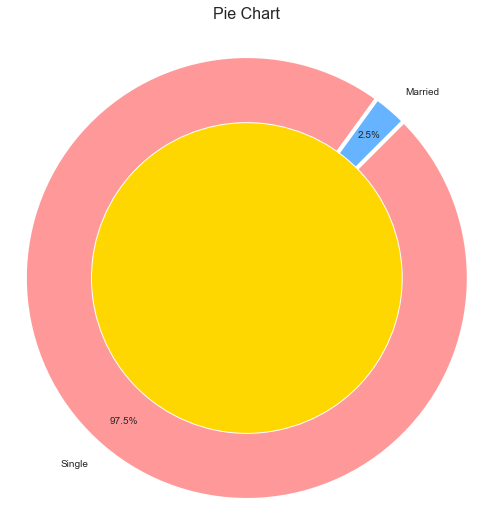

In [32]:
from matplotlib.pyplot import pie, axis, show
sums = data['MS'].value_counts()
labels = data['MS'].value_counts().index
myexplode = (0, 0)
mycolors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', "black", "hotpink", "b", "#4CAF50", '#c2c2f0','#ffb3e6']

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sums, labels=labels, autopct='%1.1f%%', shadow=False, startangle=45, colors = mycolors, explode = myexplode,\
        counterclock=False, wedgeprops={'edgecolor': 'white', 'linewidth': 4},textprops={'fontsize': 10},\
        pctdistance=0.85, radius=1)

centre_circle = plt.Circle((0,0),0.70,fc='Gold')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Pie Chart', fontsize=16, pad=20)
plt.show()

In [33]:
data_columns = ['Batch', 'SM', 'MS', 'ES', 'EC', 'TS', 'TC', 'GS', 'GC', 'GU', 'EG',\
                'GH', 'SS', 'H/D', 'Semester', 'Hostelite-S', 'SM-S', 'MS-S', 'OnBus-S',\
                'OnCar-S', 'OnBike-S', 'OnLocalBus-S', 'PI-S', 'HI-S', 'SG-S', 'MF-S',\
                'HF-S', 'RA-S', 'SSField-S', 'SInE-S', 'TS-S', 'TE-S', 'HS-S', 'SD-S',\
                'SW-S', 'SQ-S', 'MA-S', 'BL-S', 'BU-S', 'IF-S', 'City', 'Status',\
                'Gender', 'Matic', 'Board', 'Intermediate', 'Board2',\
                'Matric-Marks-Bin','Intermediate-Marks-Bin','Att_CreditHrs-Semester-Bin',\
                'Earn_CreditHrs-Semester-Bin', 'Age', 'Class']

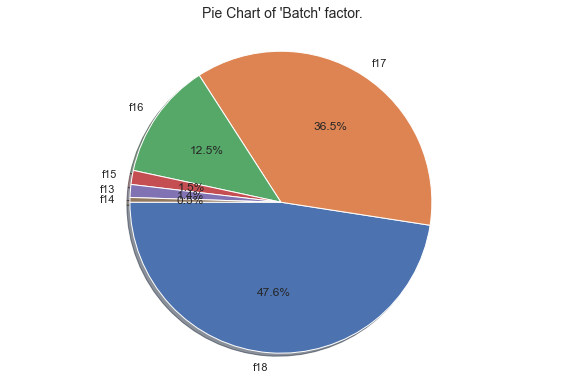

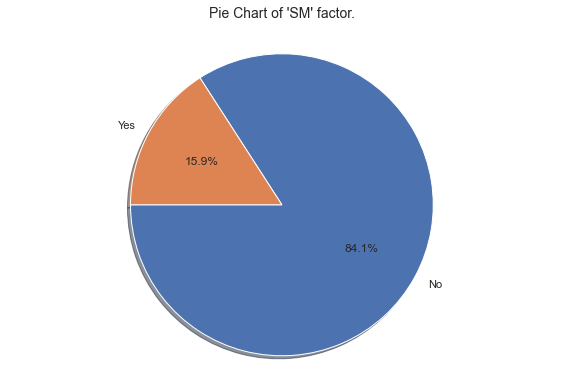

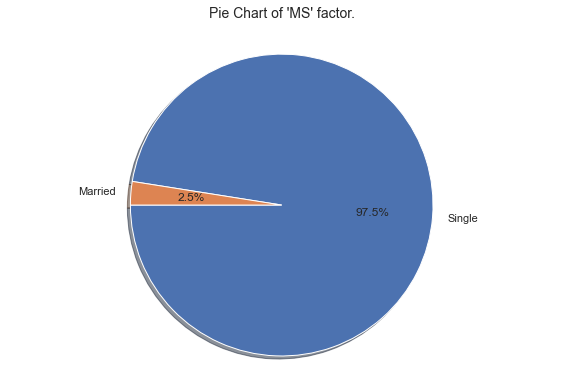

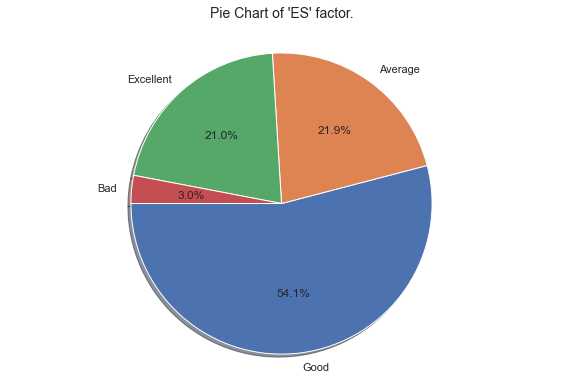

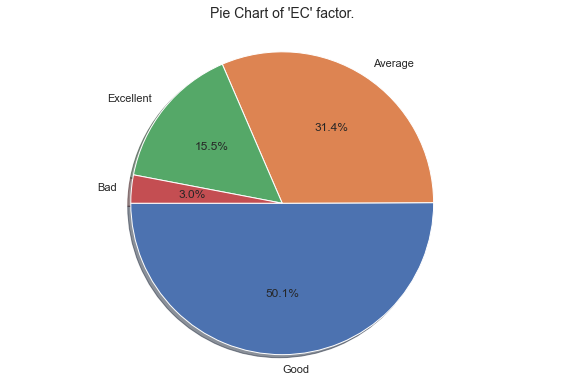

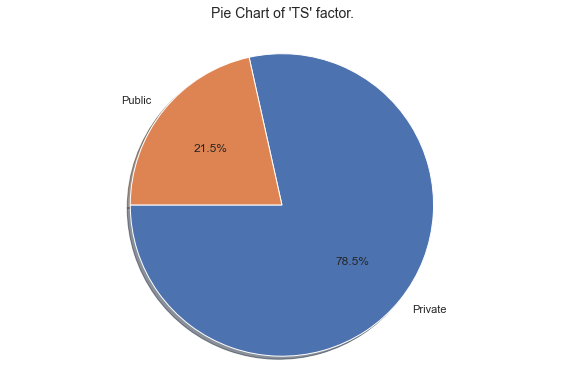

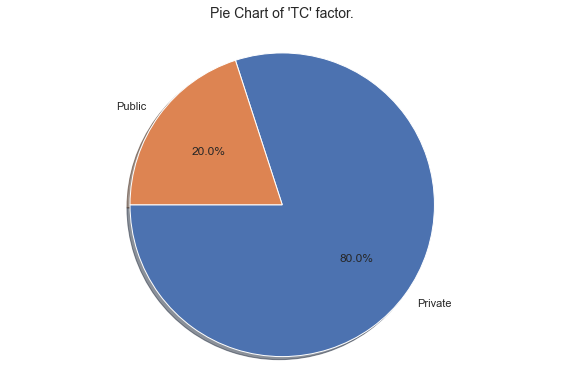

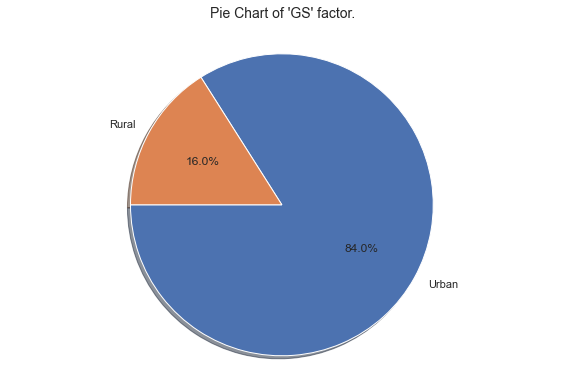

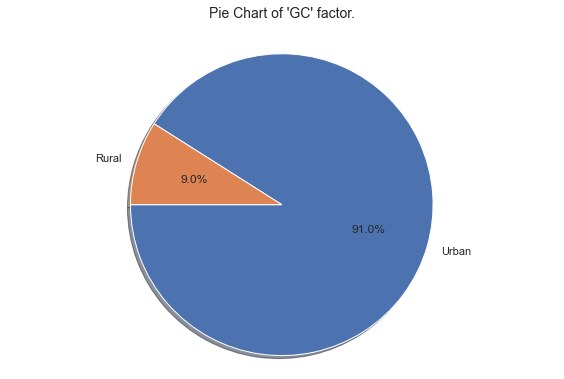

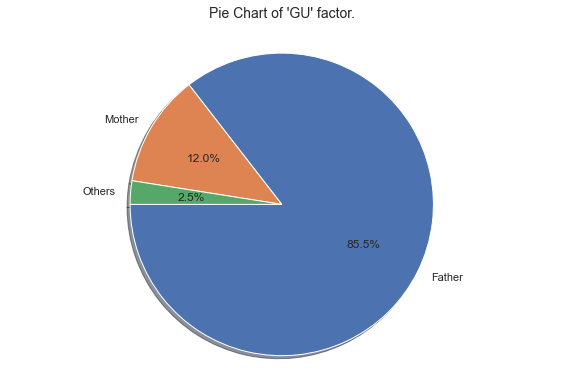

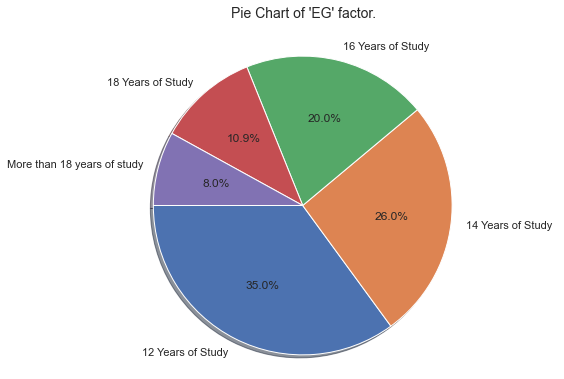

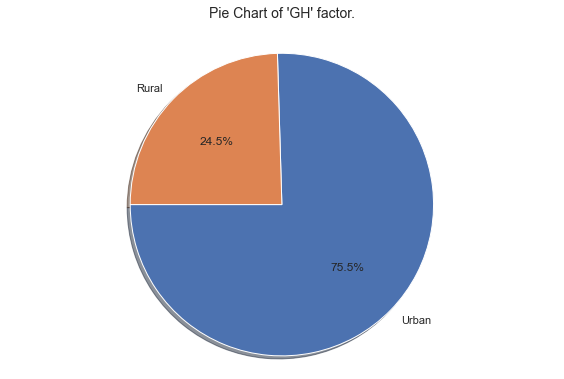

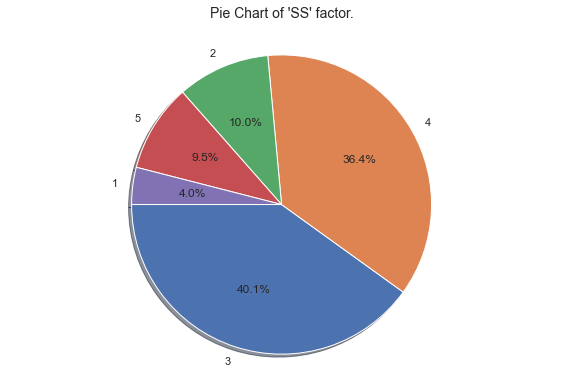

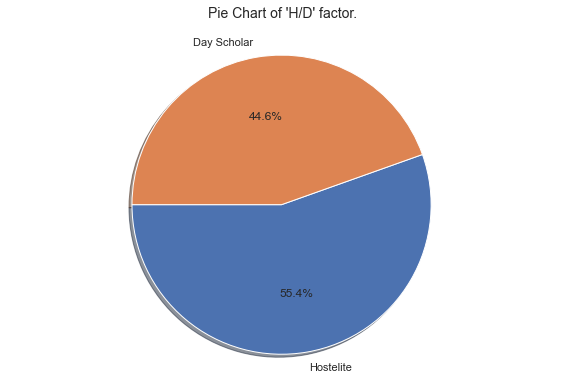

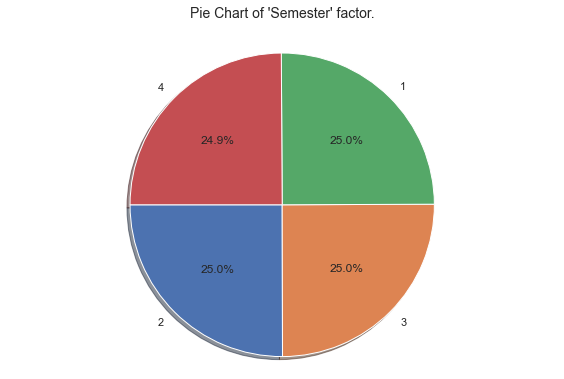

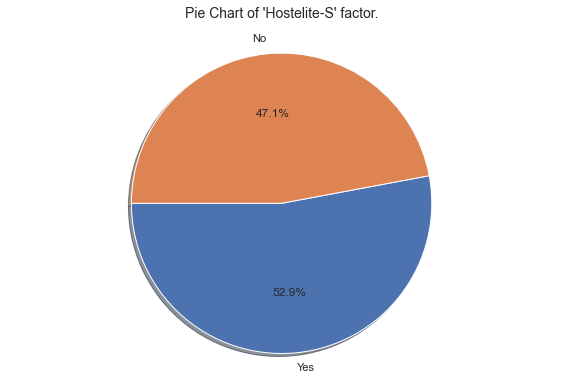

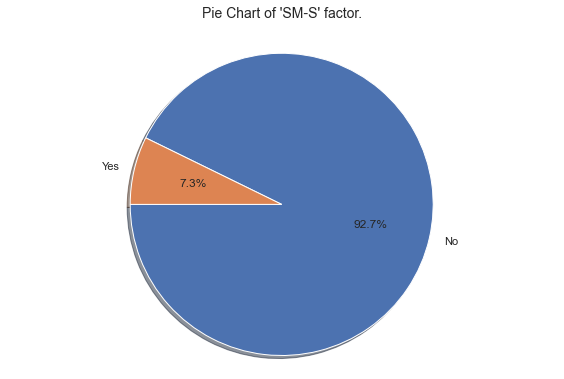

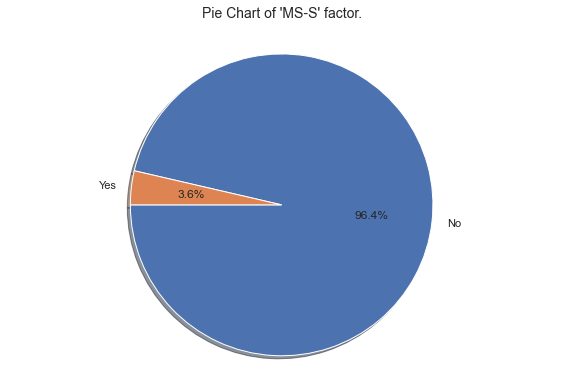

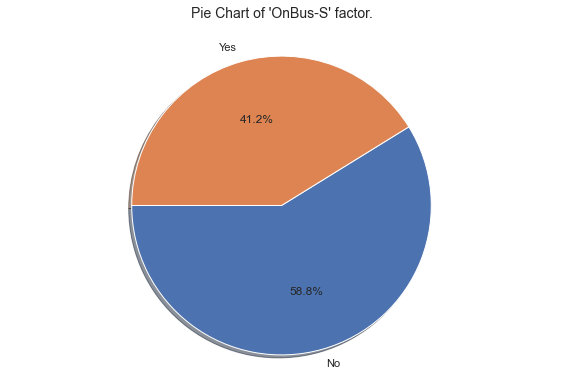

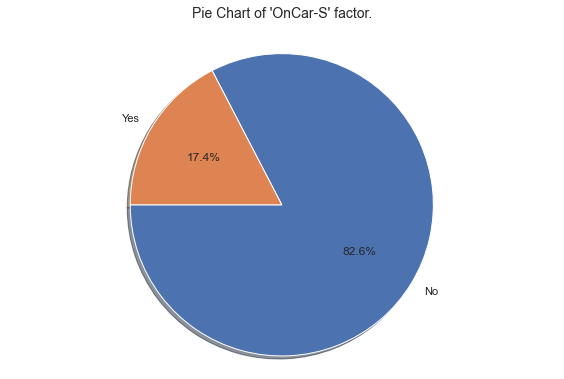

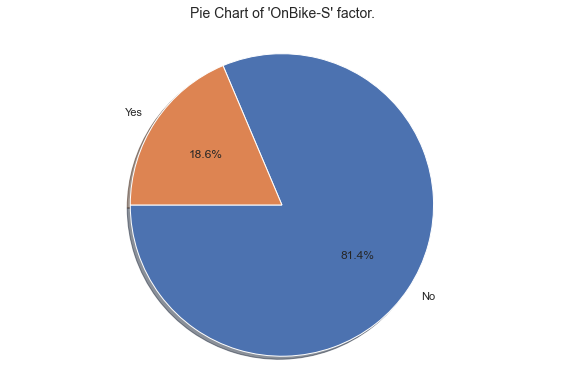

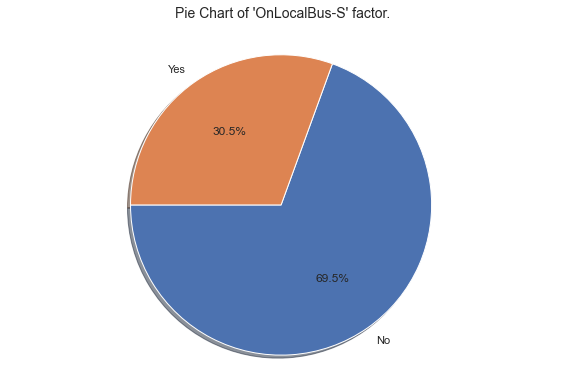

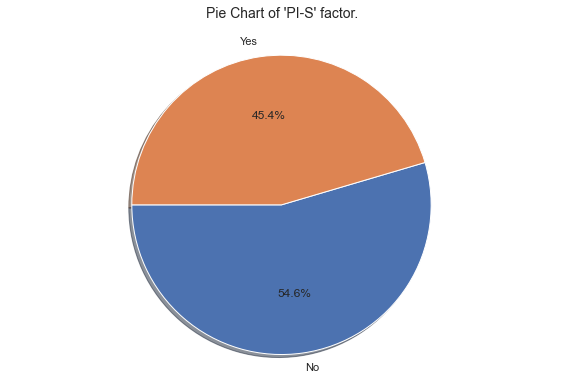

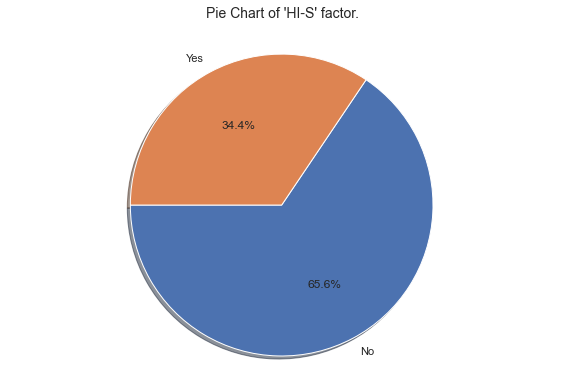

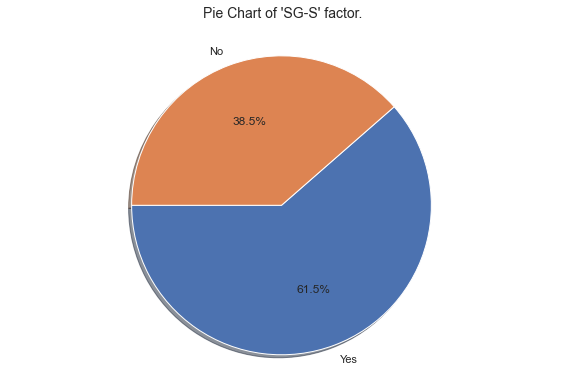

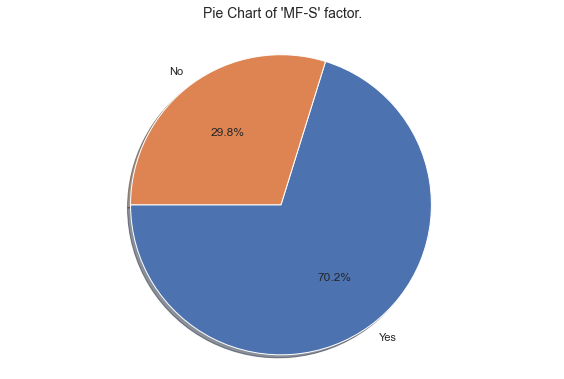

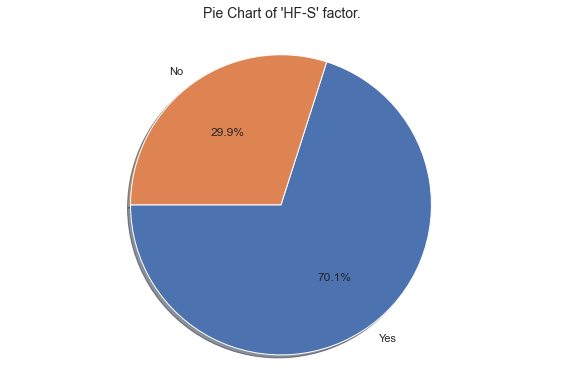

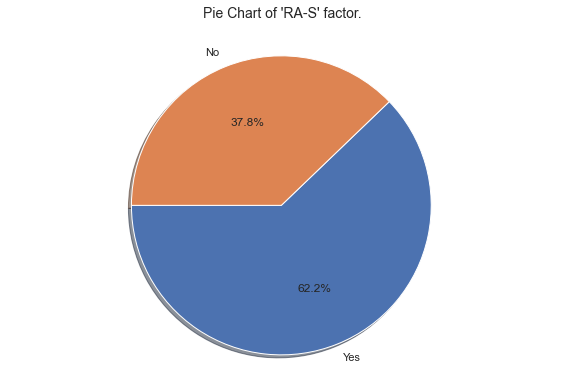

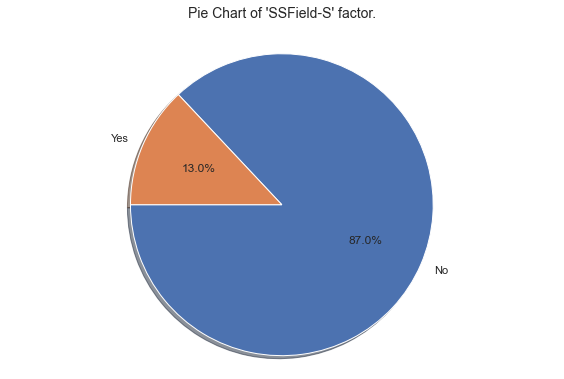

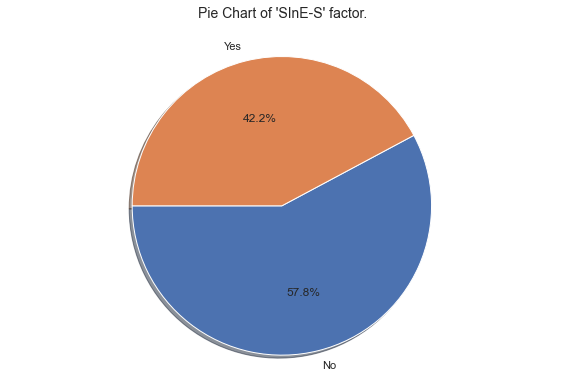

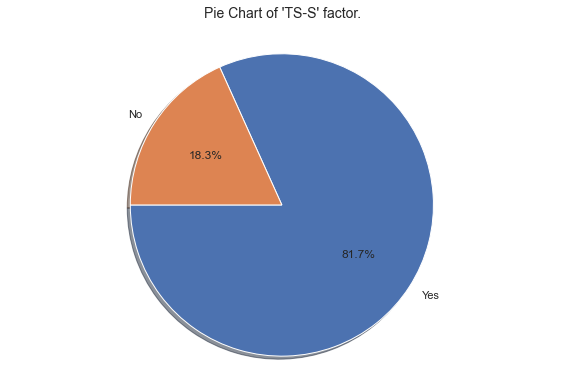

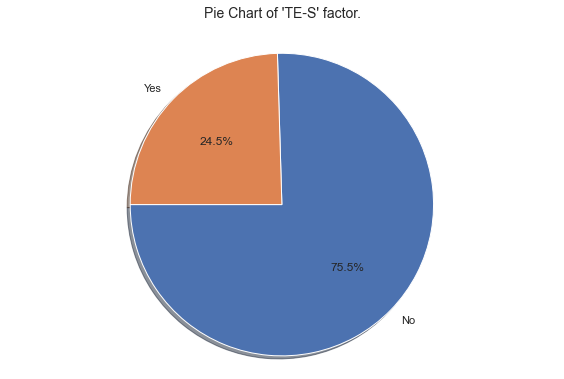

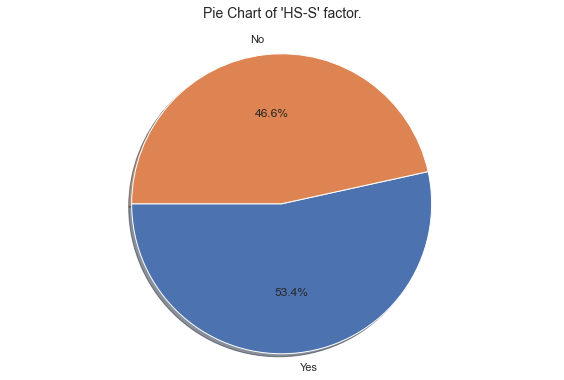

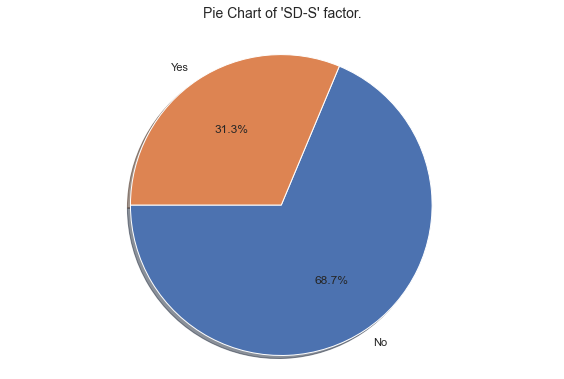

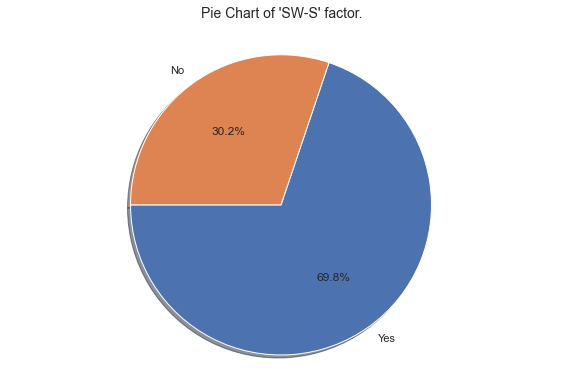

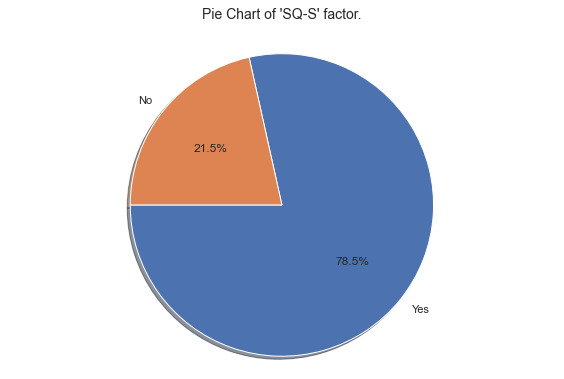

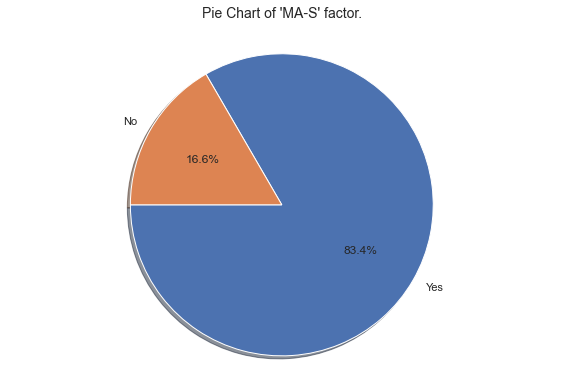

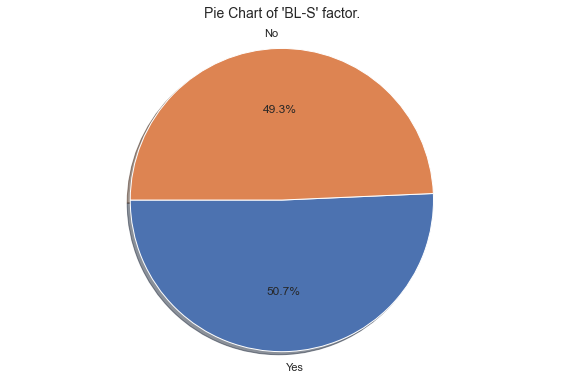

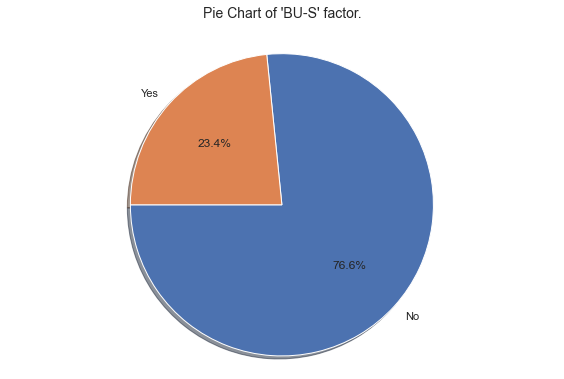

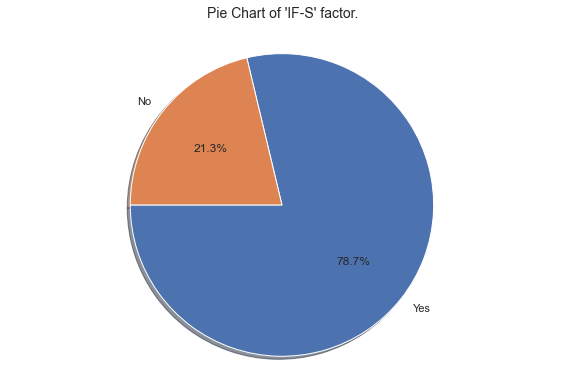

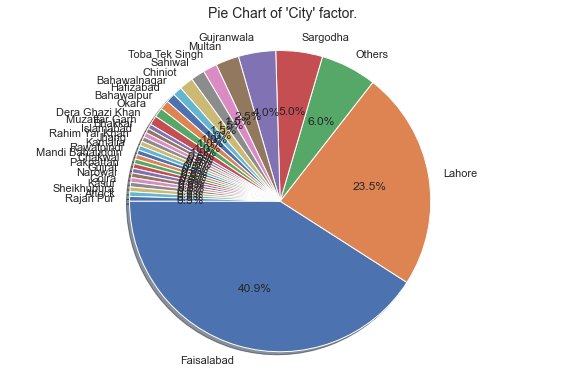

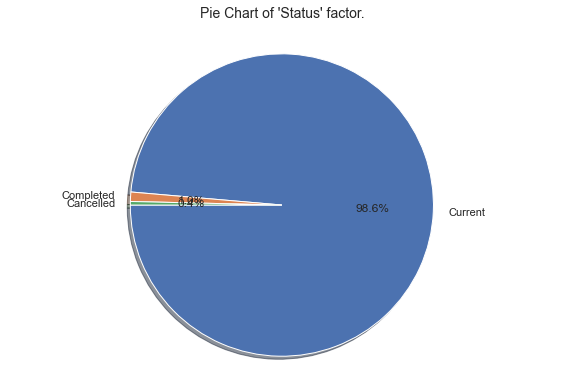

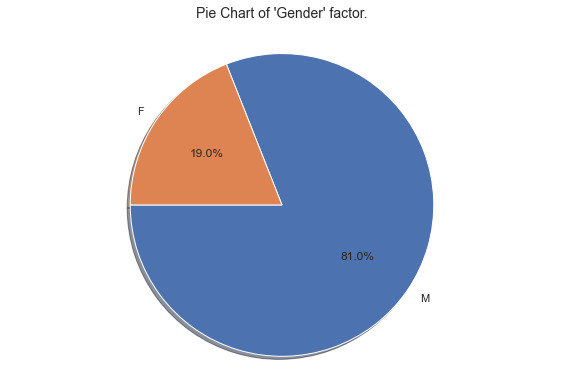

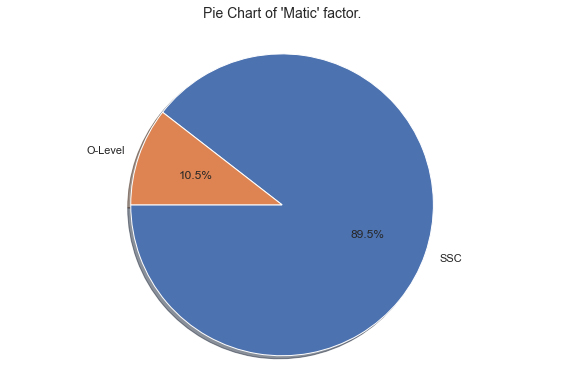

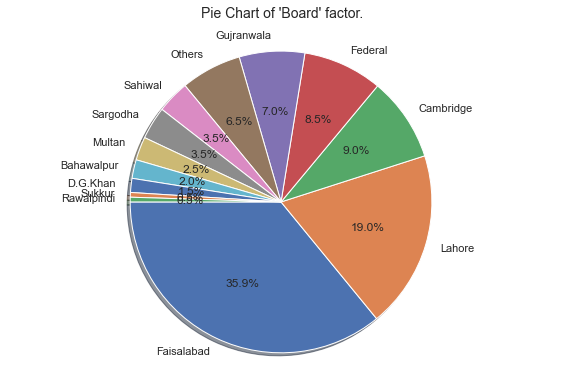

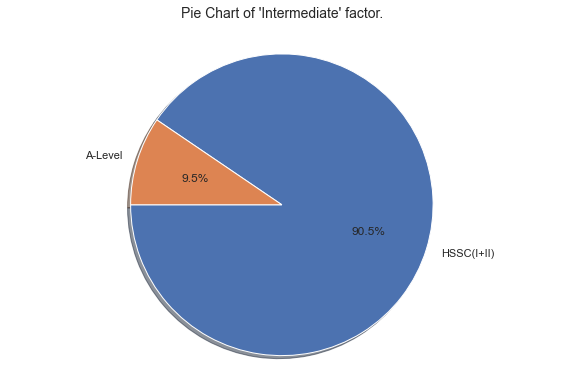

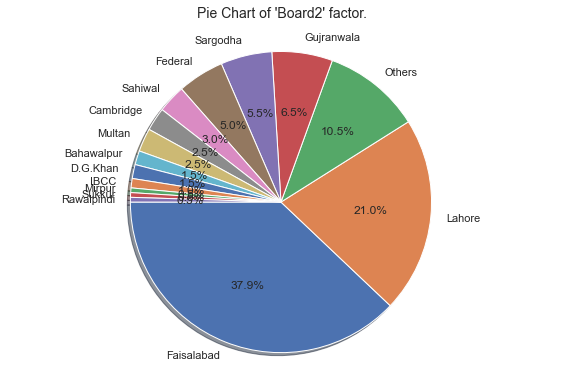

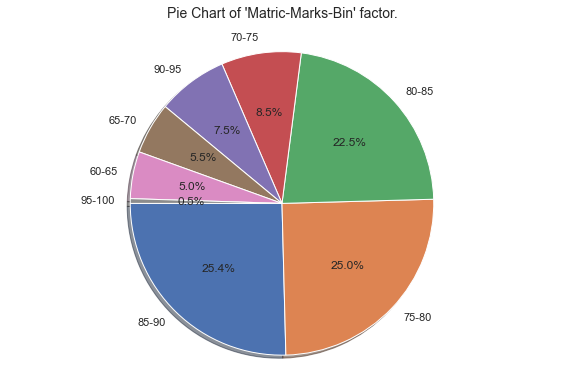

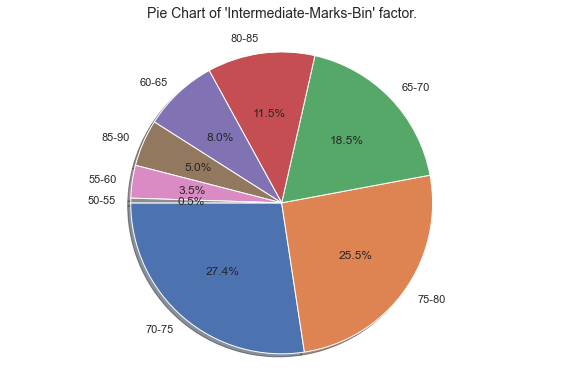

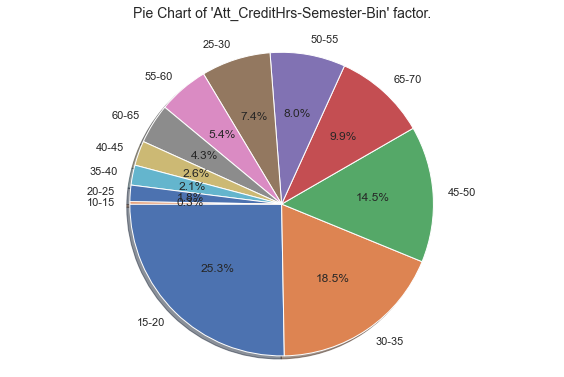

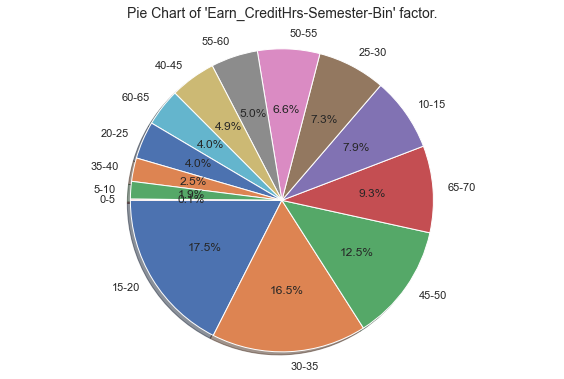

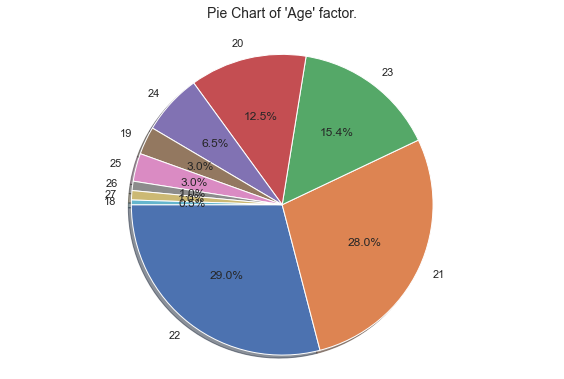

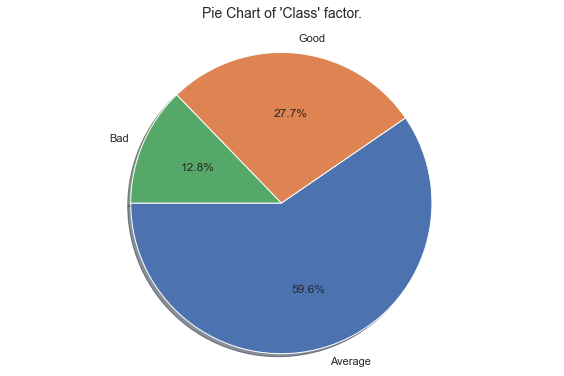

In [34]:
sel_features = data_columns

for f in sel_features:
    sums = data[f].value_counts()
    labels = data[f].value_counts().index

    fig1, ax1 = plt.subplots(figsize=[8,5])
    ax1.pie(sums, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
    ax1.axis('equal')  
    plt.tight_layout()
    plt.title("Pie Chart of '" + f + "' factor.", fontsize=14, pad=20)
    plt.show()

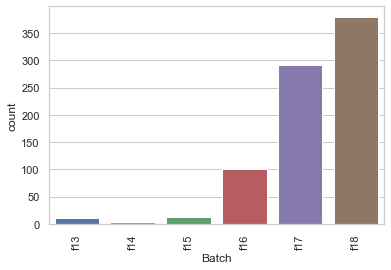

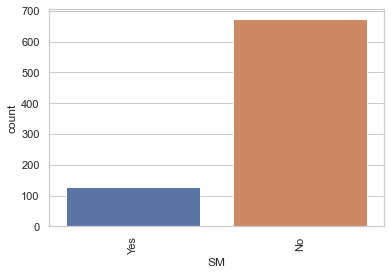

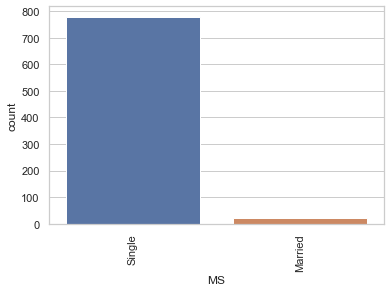

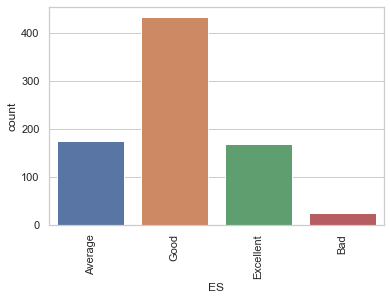

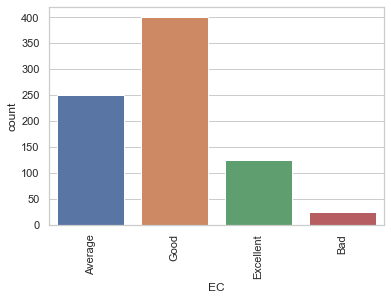

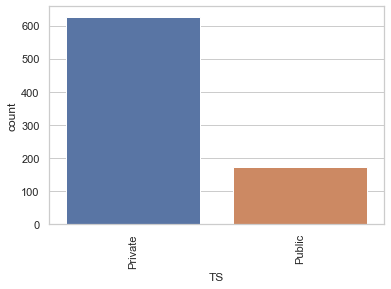

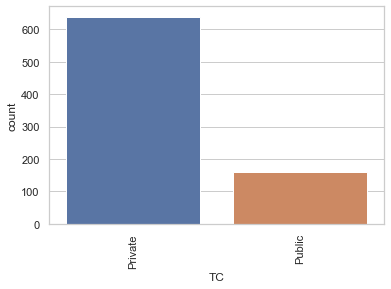

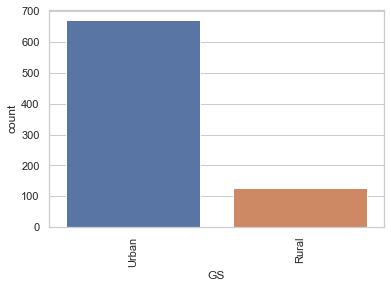

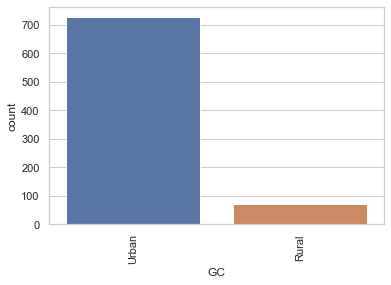

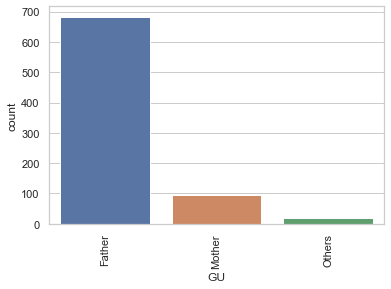

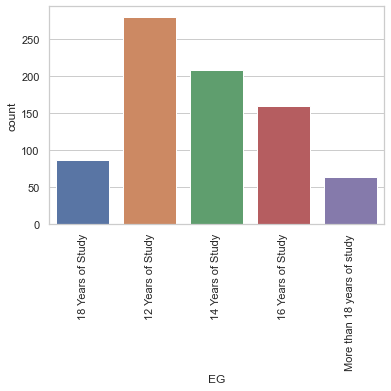

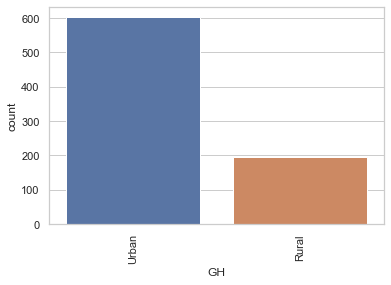

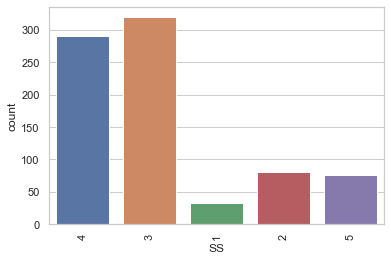

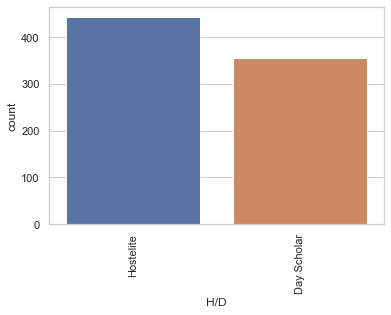

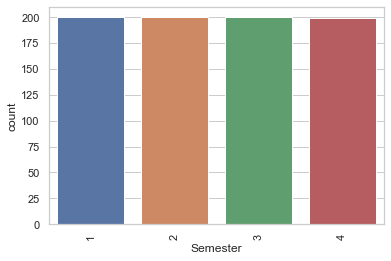

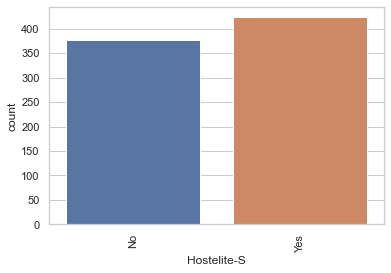

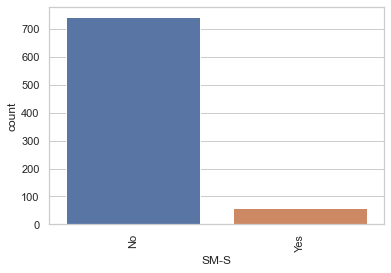

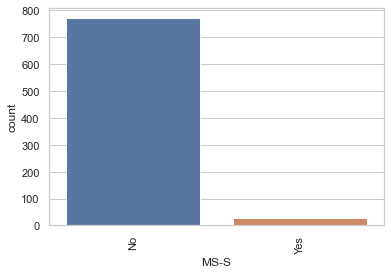

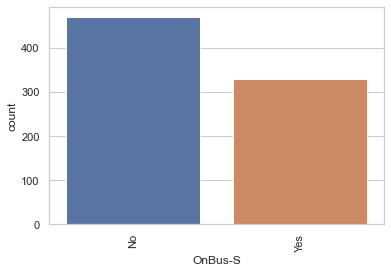

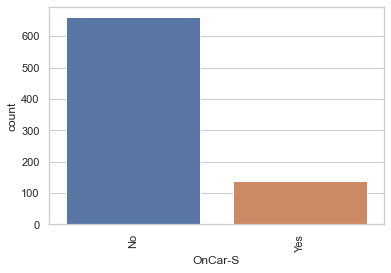

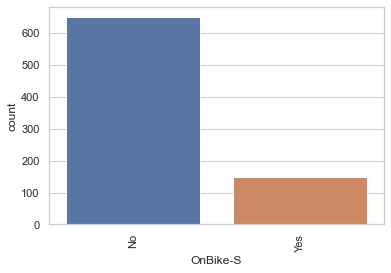

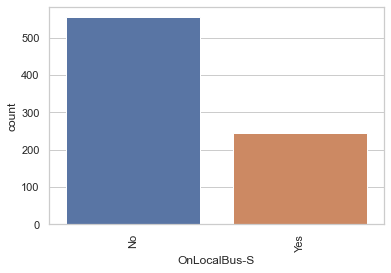

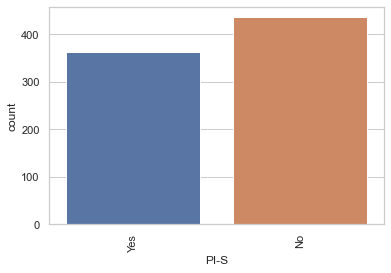

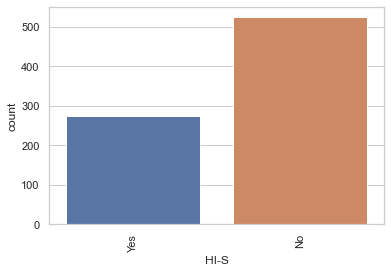

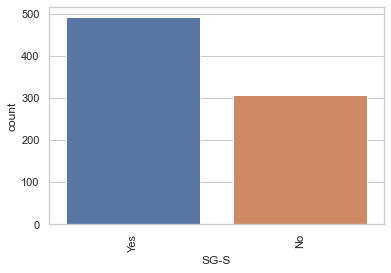

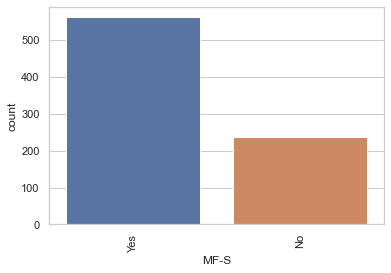

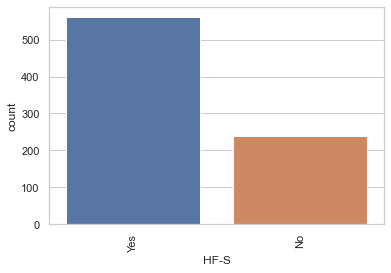

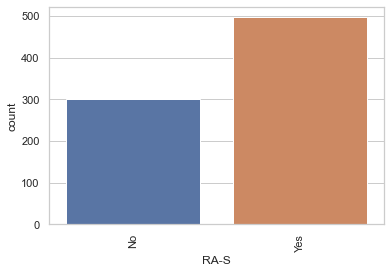

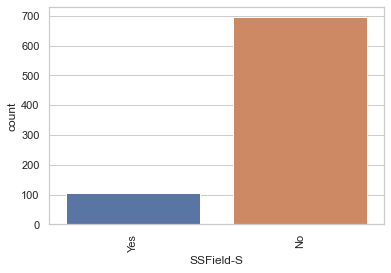

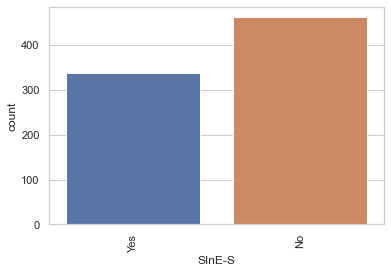

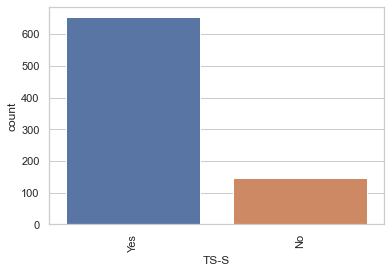

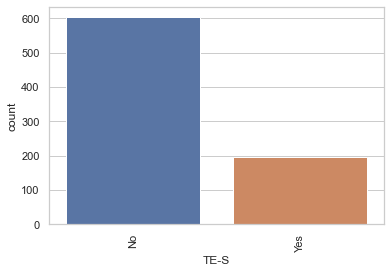

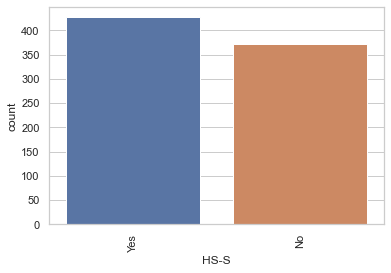

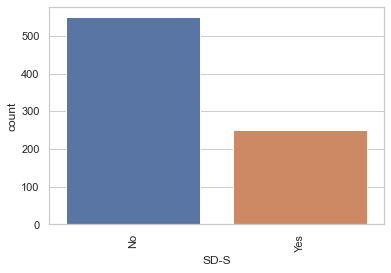

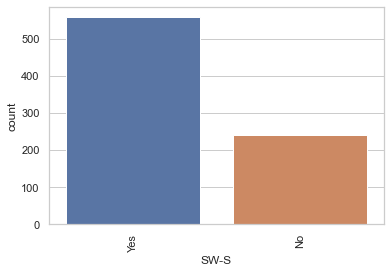

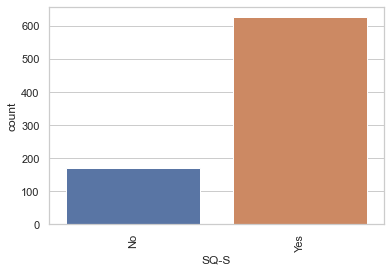

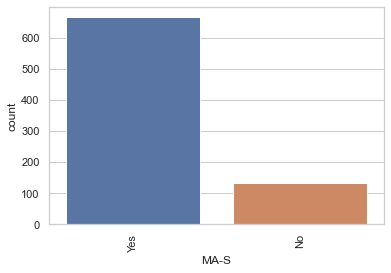

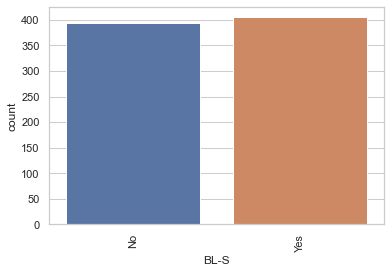

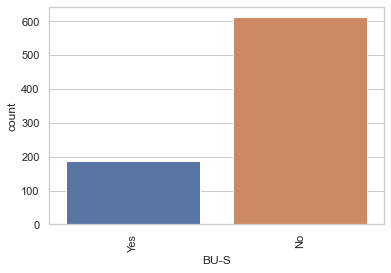

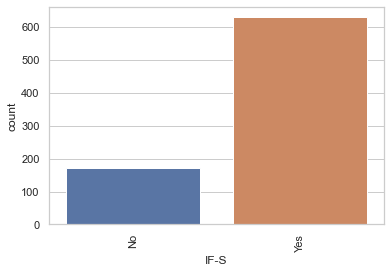

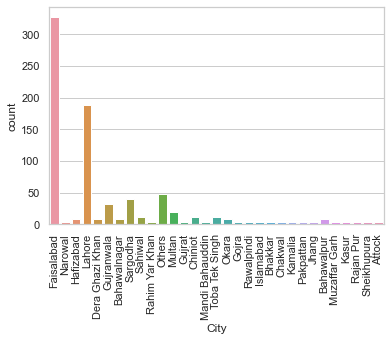

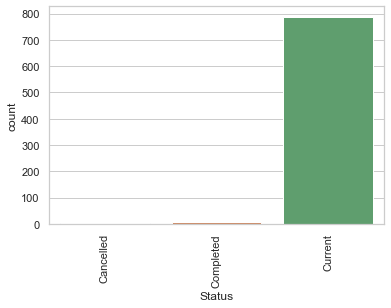

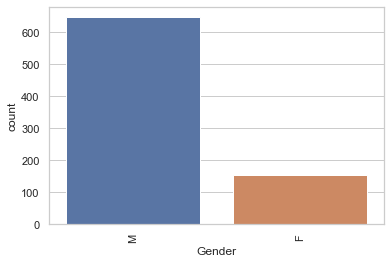

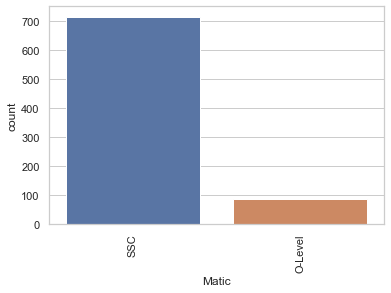

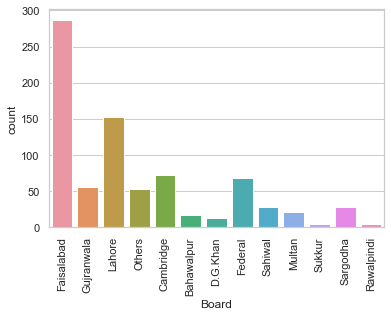

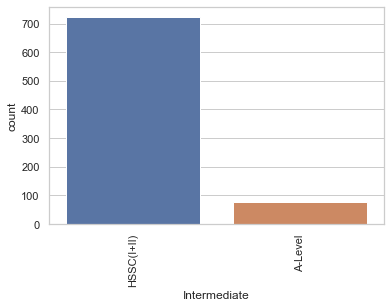

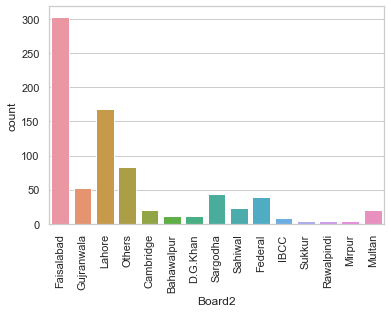

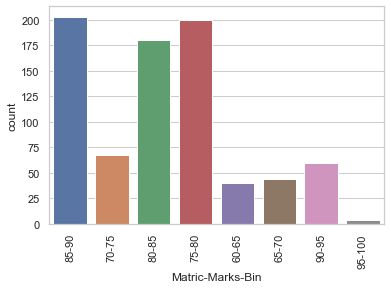

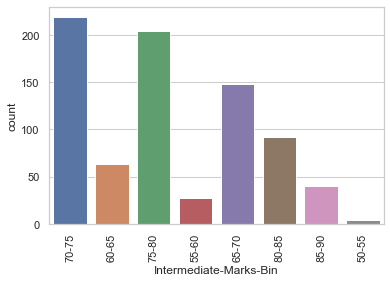

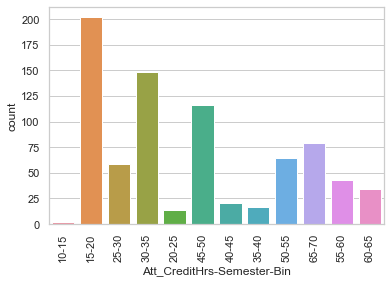

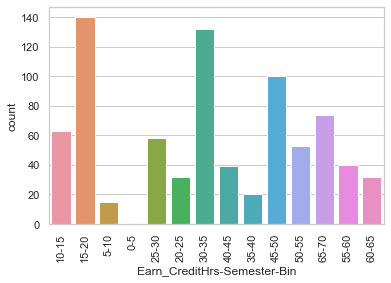

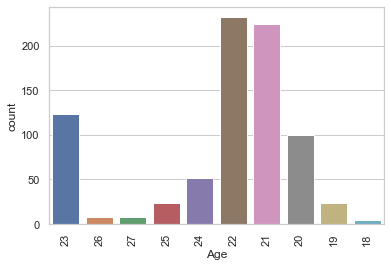

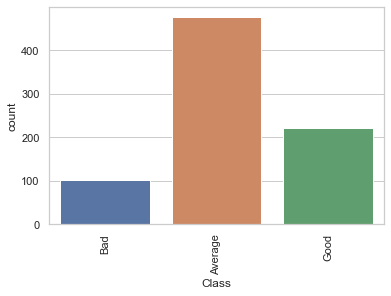

In [35]:
sel_features = data_columns


for f in sel_features:
    sns.countplot(x = f, data = data)
    plt.xticks(rotation=90)
    plt.show()

# Preprocessing for Data Stats (Data 0/1)

In [33]:
data.head(3)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Board2,Obtained2,Total2,SGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin,Age,Class
0,f13,Yes,Single,Average,Average,Private,Private,Urban,Urban,Father,...,Faisalabad,792,1100,1.0,85-90,70-75,10-15,10-15,23,Bad
1,f13,Yes,Single,Good,Good,Private,Private,Urban,Urban,Father,...,Faisalabad,678,1100,1.0,70-75,60-65,15-20,10-15,26,Bad
2,f13,Yes,Single,Good,Average,Private,Public,Rural,Rural,Father,...,Gujranwala,879,1100,1.0,85-90,75-80,15-20,15-20,27,Average


In [34]:
#Rename yes to 1 and no to 0 in all Dataframe
data = data.replace('Yes', '1')
data = data.replace('No', '0')
data.head(5)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Board2,Obtained2,Total2,SGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin,Age,Class
0,f13,1,Single,Average,Average,Private,Private,Urban,Urban,Father,...,Faisalabad,792,1100,1.0,85-90,70-75,10-15,10-15,23,Bad
1,f13,1,Single,Good,Good,Private,Private,Urban,Urban,Father,...,Faisalabad,678,1100,1.0,70-75,60-65,15-20,10-15,26,Bad
2,f13,1,Single,Good,Average,Private,Public,Rural,Rural,Father,...,Gujranwala,879,1100,1.0,85-90,75-80,15-20,15-20,27,Average
3,f14,0,Single,Average,Average,Private,Private,Urban,Urban,Mother,...,Faisalabad,674,1100,1.0,80-85,60-65,15-20,10-15,25,Bad
4,f15,0,Single,Good,Good,Private,Private,Urban,Urban,Father,...,Faisalabad,787,1100,1.0,75-80,70-75,15-20,10-15,24,Bad


In [35]:
#Rename Married to 1 and single to 0 in all Dataframe
#Rename Public to 1 and Private to 0 in all Dataframe
#Rename Urban to 1 and Rural to 0 in all Dataframe
data = data.replace('Single', '0')
data = data.replace('Married', '1')
data = data.replace('Private', '0')
data = data.replace('Public', '1')
data = data.replace('Rural', '0')
data = data.replace('Urban', '1')
data = data.replace('O-Level', '0')
data = data.replace('SSC', '1')
data = data.replace('A-Level', '0')
data = data.replace('HSSC(I+II)', '1')
data = data.replace('F', '0')
data = data.replace('M', '1')
data = data.replace('Day Scholar', '0')
data = data.replace('Hostelite', '1')

data.head(3)

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Board2,Obtained2,Total2,SGPA-Semester,Matric-Marks-Bin,Intermediate-Marks-Bin,Att_CreditHrs-Semester-Bin,Earn_CreditHrs-Semester-Bin,Age,Class
0,f13,1,0,Average,Average,0,0,1,1,Father,...,Faisalabad,792,1100,1.0,85-90,70-75,10-15,10-15,23,Bad
1,f13,1,0,Good,Good,0,0,1,1,Father,...,Faisalabad,678,1100,1.0,70-75,60-65,15-20,10-15,26,Bad
2,f13,1,0,Good,Average,0,1,0,0,Father,...,Gujranwala,879,1100,1.0,85-90,75-80,15-20,15-20,27,Average


In [36]:
data.columns

Index(['Batch', 'SM', 'MS', 'ES', 'EC', 'TS', 'TC', 'GS', 'GC', 'GU', 'EG',
       'OG', 'GH', 'SS', 'H/D', 'Semester', 'Hostelite-S', 'SM-S', 'MS-S',
       'OnBus-S', 'OnCar-S', 'OnBike-S', 'OnLocalBus-S', 'PI-S', 'HI-S',
       'SG-S', 'MF-S', 'HF-S', 'RA-S', 'SSField-S', 'SInE-S', 'TS-S', 'TE-S',
       'HS-S', 'SD-S', 'SW-S', 'SQ-S', 'MA-S', 'BL-S', 'BU-S', 'IF-S',
       'Student_Campus', 'City', 'Student_Lat', 'Std_Long',
       'Student_Home_Uni_Distance(km)', 'Status', 'Gender', 'Matic', 'Board',
       'Obtained', 'Total', 'Intermediate', 'Board2', 'Obtained2', 'Total2',
       'SGPA-Semester', 'Matric-Marks-Bin', 'Intermediate-Marks-Bin',
       'Att_CreditHrs-Semester-Bin', 'Earn_CreditHrs-Semester-Bin', 'Age',
       'Class'],
      dtype='object')

In [37]:
sel_features = ['Batch', 'ES', 'EC', 'GU', 'EG', 'SS',\
       'Matric-Marks-Bin','Intermediate-Marks-Bin', 'Att_CreditHrs-Semester-Bin',\
       'Earn_CreditHrs-Semester-Bin', 'Age']

In [38]:
# Making categorical variables into numeric representation

print(data.shape)

# keeping the columns we need 
raw_data = data[sel_features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = sel_features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data

(799, 63)
(799, 11)
(799, 79)


,Batch_f13,Batch_f14,Batch_f15,Batch_f16,Batch_f17,Batch_f18,ES_Average,ES_Bad,ES_Excellent,ES_Good,...,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
796,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
797,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
798,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [39]:
result = pd.concat([data, new_raw_data], axis=1)
result

,Batch,SM,MS,ES,EC,TS,TC,GS,GC,GU,...,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27
0,f13,1,0,Average,Average,0,0,1,1,Father,...,0,0,0,0,0,1,0,0,0,0
1,f13,1,0,Good,Good,0,0,1,1,Father,...,0,0,0,0,0,0,0,0,1,0
2,f13,1,0,Good,Average,0,1,0,0,Father,...,0,0,0,0,0,0,0,0,0,1
3,f14,0,0,Average,Average,0,0,1,1,Mother,...,0,0,0,0,0,0,0,1,0,0
4,f15,0,0,Good,Good,0,0,1,1,Father,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,f18,0,0,Excellent,Excellent,0,0,1,1,Father,...,0,0,0,0,1,0,0,0,0,0
796,f18,0,0,Excellent,Good,0,0,0,0,Father,...,0,0,0,0,1,0,0,0,0,0
797,f18,0,0,Excellent,Excellent,0,1,1,1,Father,...,0,0,0,1,0,0,0,0,0,0
798,f18,0,0,Good,Good,1,0,1,1,Father,...,0,0,0,1,0,0,0,0,0,0


In [40]:
data = result.drop(['Batch', 'ES', 'EC', 'GU', 'EG',\
       'SS', 'Semester',\
       'SGPA-Semester','OG',\
       'Student_Campus', 'City', 'Student_Lat', 'Std_Long',\
       'Student_Home_Uni_Distance(km)', 'Status',\
       'Board', 'Obtained', 'Total', 'Board2',\
       'Obtained2', 'Total2',\
       'Matric-Marks-Bin','Intermediate-Marks-Bin', 'Att_CreditHrs-Semester-Bin',\
       'Earn_CreditHrs-Semester-Bin', 'Age'], axis=1)

data

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
796,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
797,0,0,0,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
798,0,0,1,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
converted_list = []

for element in data:
    converted_list.append(element.strip())

print(len(converted_list))
print(converted_list)

116
['SM', 'MS', 'TS', 'TC', 'GS', 'GC', 'GH', 'H/D', 'Hostelite-S', 'SM-S', 'MS-S', 'OnBus-S', 'OnCar-S', 'OnBike-S', 'OnLocalBus-S', 'PI-S', 'HI-S', 'SG-S', 'MF-S', 'HF-S', 'RA-S', 'SSField-S', 'SInE-S', 'TS-S', 'TE-S', 'HS-S', 'SD-S', 'SW-S', 'SQ-S', 'MA-S', 'BL-S', 'BU-S', 'IF-S', 'Gender', 'Matic', 'Intermediate', 'Class', 'Batch_f13', 'Batch_f14', 'Batch_f15', 'Batch_f16', 'Batch_f17', 'Batch_f18', 'ES_Average', 'ES_Bad', 'ES_Excellent', 'ES_Good', 'EC_Average', 'EC_Bad', 'EC_Excellent', 'EC_Good', 'GU_Father', 'GU_Mother', 'GU_Others', 'EG_12 Years of Study', 'EG_14 Years of Study', 'EG_16 Years of Study', 'EG_18 Years of Study', 'EG_More than 18 years of study', 'SS_1', 'SS_2', 'SS_3', 'SS_4', 'SS_5', 'Matric-Marks-Bin_60-65', 'Matric-Marks-Bin_65-70', 'Matric-Marks-Bin_70-75', 'Matric-Marks-Bin_75-80', 'Matric-Marks-Bin_80-85', 'Matric-Marks-Bin_85-90', 'Matric-Marks-Bin_90-95', 'Matric-Marks-Bin_95-100', 'Intermediate-Marks-Bin_50-55', 'Intermediate-Marks-Bin_55-60', 'Interme

In [42]:
data1 =  pd.DataFrame(data).copy()
data1.shape

(799, 116)

In [43]:
data1 = data.drop('Class', axis=1)
data1.shape

(799, 115)

In [44]:
data1.head()

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
data1 = data1.astype('int64')
data2 =  pd.DataFrame(data1).copy()
data2.shape

(799, 115)

In [46]:
data1['Class'] = dataset['Class']
data1.shape

(799, 116)

In [47]:
for col in data1:
    print(data1[col].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Bad' 'Average' 'Good']


In [48]:
data1.isnull().values.any()

False

# Gender wise analysis 

 male patient  :  80.97622027534418
female patient :  19.02377972465582


<Figure size 432x288 with 0 Axes>

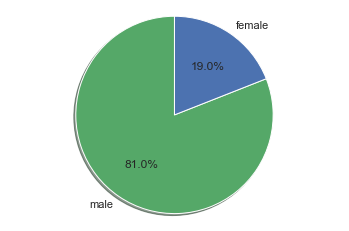

<Figure size 432x288 with 0 Axes>

In [52]:
mean_male=data1['Gender'].mean()
mean_female=1-mean_male
print(" male patient  : ", mean_male*100)
print("female patient : ", (mean_female)*100)


labels = 'male', 'female'
sizes = [mean_male*100, (mean_female)*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%0.1f%%',shadow=True,colors =['g','b'] ,startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig("gender.pdf")
plt.figure(0)
#plt.show()

# Semester Wise Data Analysis

In [53]:
newdata = pd.read_csv('CGPA_Data_Student_Final_v5_final1.csv')
newdata.head(5)

,Batch,Student_Degree,Student_Department,Student_Program,Timestamp,SM,MS,ES,EC,TS,...,SGPA-Semester2,CGPA-Semester2,Att_CreditHrs-Semester3,Earn_CreditHrs-Semester3,SGPA-Semester3,CGPA-Semester3,Att_CreditHrs-Semester4,Earn_CreditHrs-Semester4,SGPA-Semester4,CGPA-Semester4
0,f13,Bachelors,Computer Science,BS(CS),26-12-20 22:47,Yes,Single,Average,Average,Private,...,1,1.61,20,20,1,1.94,NaN,NaN,NaN,NaN
1,f13,Bachelors,Computer Science,BS(CS),26-12-20 12:20,Yes,Single,Good,Good,Private,...,1,2.39,47,44,1,2.13,53.0,50.0,1.0,2.19
2,f13,Bachelors,Computer Science,BS(CS),24-12-20 9:38,Yes,Single,Good,Average,Private,...,1,2.18,43,36,1,2.10,49.0,44.0,1.0,2.22
3,f14,Bachelors,Computer Science,BS(CS),16-12-20 9:10,No,Single,Average,Average,Private,...,1,2.16,41,37,1,2.41,53.0,43.0,1.0,2.11
4,f15,Bachelors,Computer Science,BS(CS),11-12-20 17:11,No,Single,Good,Good,Private,...,1,1.72,26,23,1,2.10,40.0,36.0,1.0,1.99


In [54]:
#Printed Column Names
converted_list = []

for element in newdata.columns:
    converted_list.append(element.strip())

print(len(converted_list))
print(converted_list)

159
['Batch', 'Student_Degree', 'Student_Department', 'Student_Program', 'Timestamp', 'SM', 'MS', 'ES', 'EC', 'TS', 'TC', 'GS', 'GC', 'GU', 'EG', 'OG', 'GH', 'SS', 'H/D', 'Hostelite1', 'SM1', 'MS1', 'OnBus1', 'OnCar1', 'OnBike1', 'OnLocalBus1', 'PI1', 'HI1', 'SG1', 'MF1', 'HF1', 'RA1', 'SSField1', 'SInE1', 'TS1', 'TE1', 'HS1', 'SD1', 'SW1', 'SQ1', 'MA1', 'BL1', 'BU1', 'IF1', 'Hostelite2', 'SM2', 'MS2', 'OnBus2', 'OnCar2', 'OnBike2', 'OnLocalBus2', 'PI2', 'HI2', 'SG2', 'MF2', 'HF2', 'RA2', 'SSField2', 'SInE2', 'TS2', 'TE2', 'HS2', 'SD2', 'SW2', 'SQ2', 'MA2', 'BL2', 'BU2', 'IF2', 'Hostelite3', 'SM3', 'MS3', 'OnBus3', 'OnCar3', 'OnBike3', 'OnLocalBus3', 'PI3', 'HI3', 'SG3', 'MF3', 'HF3', 'RA3', 'SSField3', 'SInE3', 'TS3', 'TE3', 'HS3', 'SD3', 'SW3', 'SQ3', 'MA3', 'BL3', 'BU3', 'IF3', 'Hostelite4', 'SM4', 'MS4', 'OnBus4', 'OnCar4', 'OnBike4', 'OnLocalBus4', 'PI4', 'HI4', 'SG4', 'MF4', 'HF4', 'RA4', 'SSField4', 'SInE4', 'TS4', 'TE4', 'HS4', 'SD4', 'SW4', 'SQ4', 'MA4', 'BL4', 'BU4', 'IF4', '

In [55]:
newdata = newdata[['Hostelite1', 'SM1', 'MS1', 'OnBus1', 'OnCar1', 'OnBike1', 'OnLocalBus1', 'PI1', 'HI1',\
                   'SG1', 'MF1', 'HF1', 'RA1', 'SSField1', 'SInE1', 'TS1', 'TE1', 'HS1', 'SD1', 'SW1', 'SQ1',\
                   'MA1', 'BL1', 'BU1', 'IF1', 'Hostelite2', 'SM2', 'MS2', 'OnBus2', 'OnCar2', 'OnBike2',\
                   'OnLocalBus2', 'PI2', 'HI2', 'SG2', 'MF2', 'HF2', 'RA2', 'SSField2', 'SInE2', 'TS2', 'TE2',\
                   'HS2', 'SD2', 'SW2', 'SQ2', 'MA2', 'BL2', 'BU2', 'IF2', 'Hostelite3', 'SM3', 'MS3', 'OnBus3',\
                   'OnCar3', 'OnBike3', 'OnLocalBus3', 'PI3', 'HI3', 'SG3', 'MF3', 'HF3', 'RA3', 'SSField3',\
                   'SInE3', 'TS3', 'TE3', 'HS3', 'SD3', 'SW3', 'SQ3', 'MA3', 'BL3', 'BU3', 'IF3', 'Hostelite4',\
                   'SM4', 'MS4', 'OnBus4', 'OnCar4', 'OnBike4', 'OnLocalBus4', 'PI4', 'HI4', 'SG4', 'MF4', 'HF4',\
                   'RA4', 'SSField4', 'SInE4', 'TS4', 'TE4', 'HS4', 'SD4', 'SW4', 'SQ4', 'MA4', 'BL4', 'BU4', 'IF4',]]
newdata.head(5)

,Hostelite1,SM1,MS1,OnBus1,OnCar1,OnBike1,OnLocalBus1,PI1,HI1,SG1,...,TS4,TE4,HS4,SD4,SW4,SQ4,MA4,BL4,BU4,IF4
0,No,No,No,No,No,No,No,Yes,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes
1,No,No,No,Yes,No,No,No,No,No,Yes,...,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes
2,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,...,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No
4,No,No,No,Yes,No,No,Yes,Yes,No,Yes,...,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes


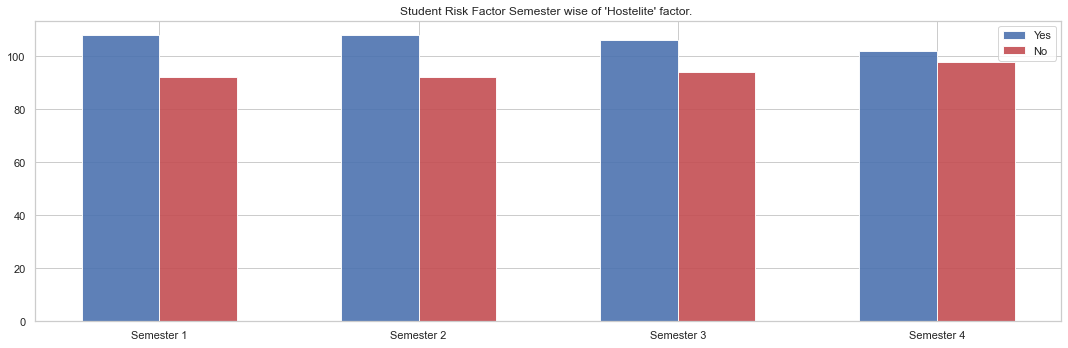

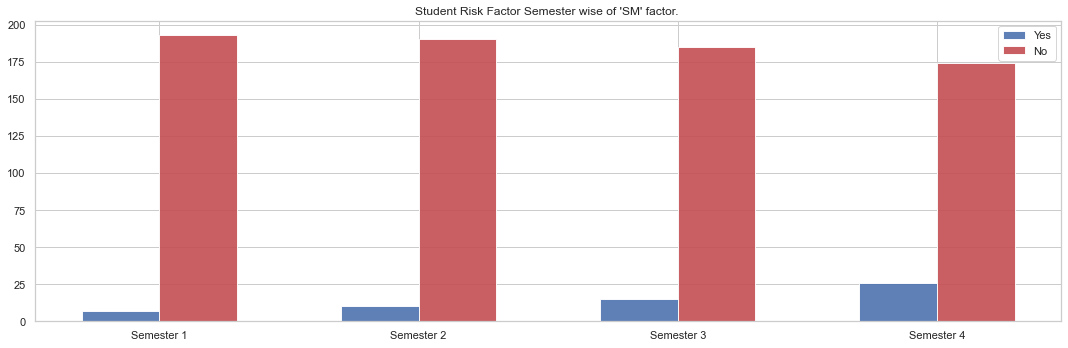

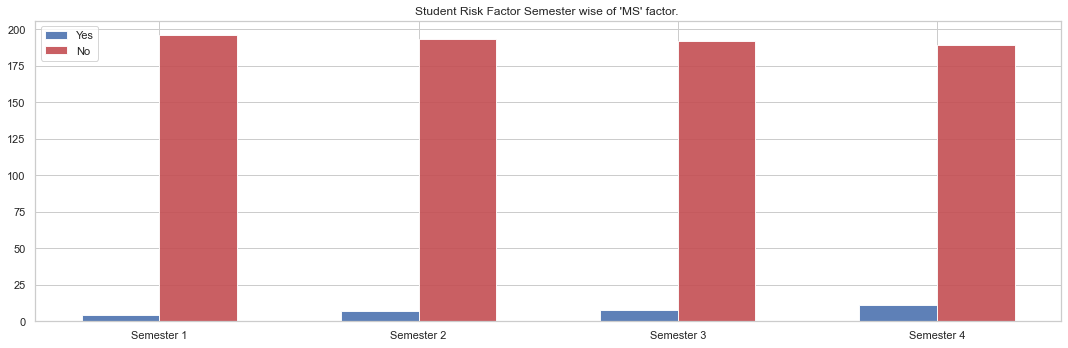

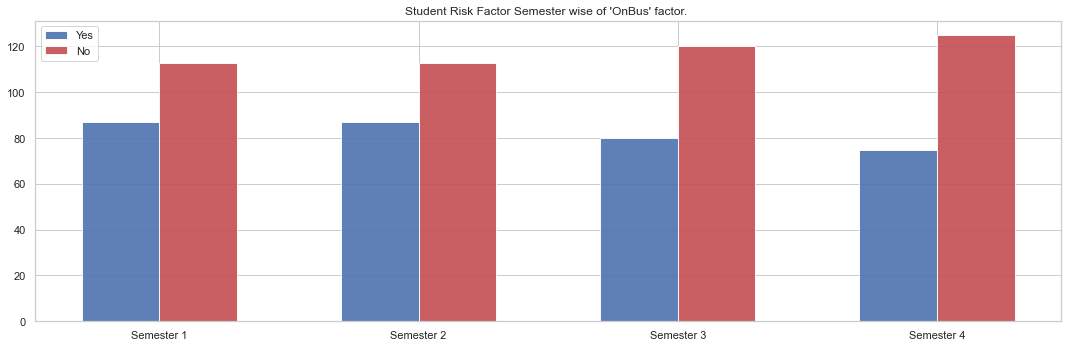

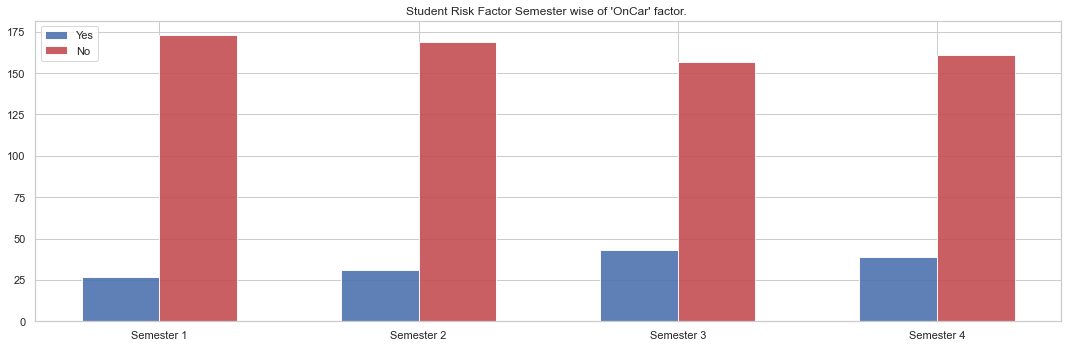

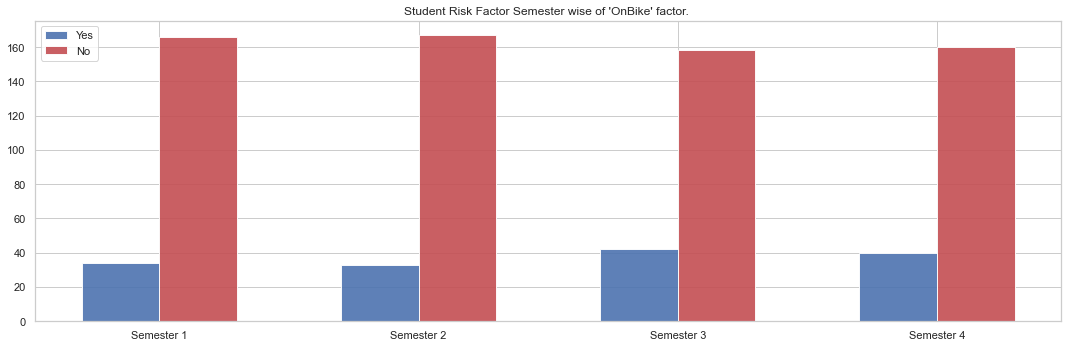

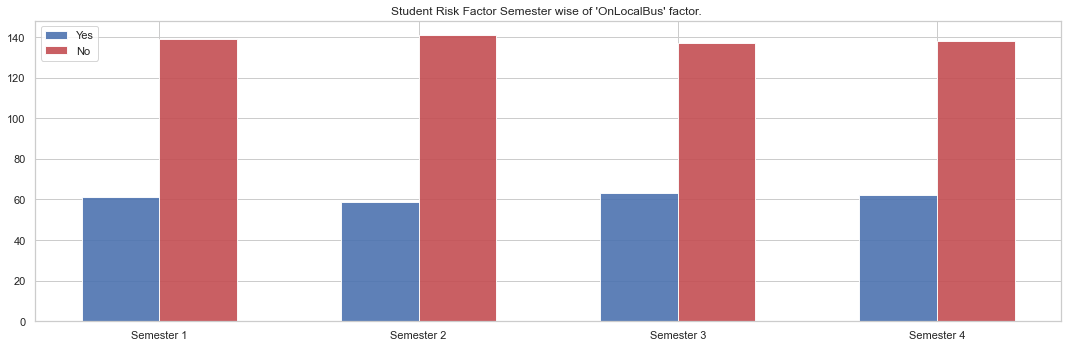

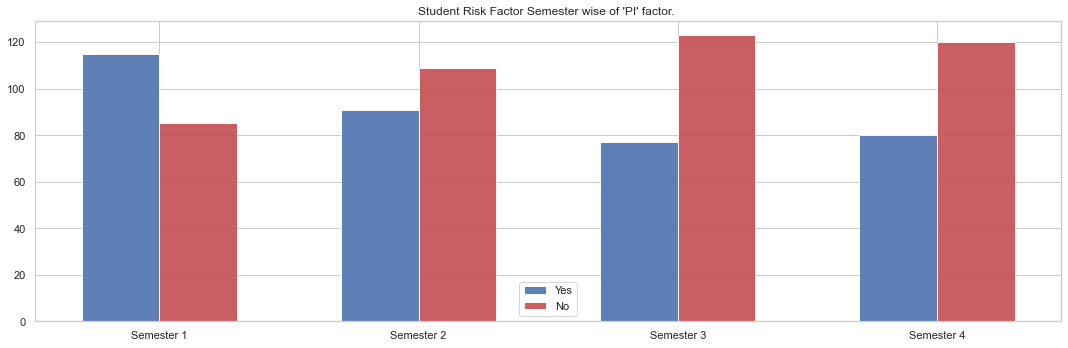

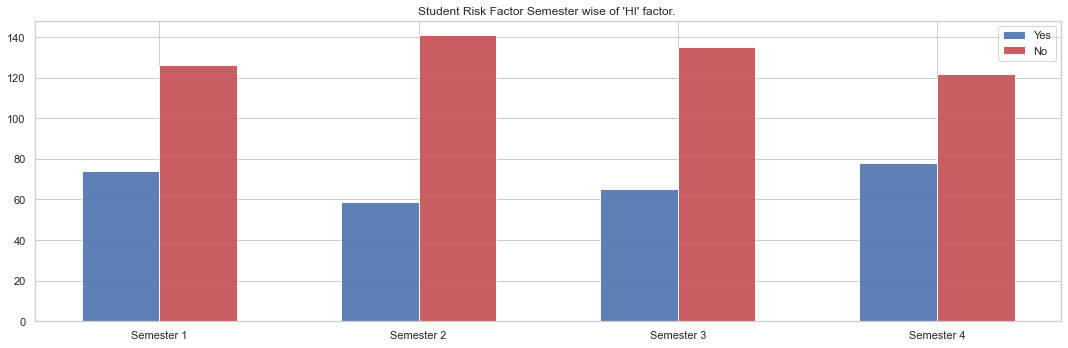

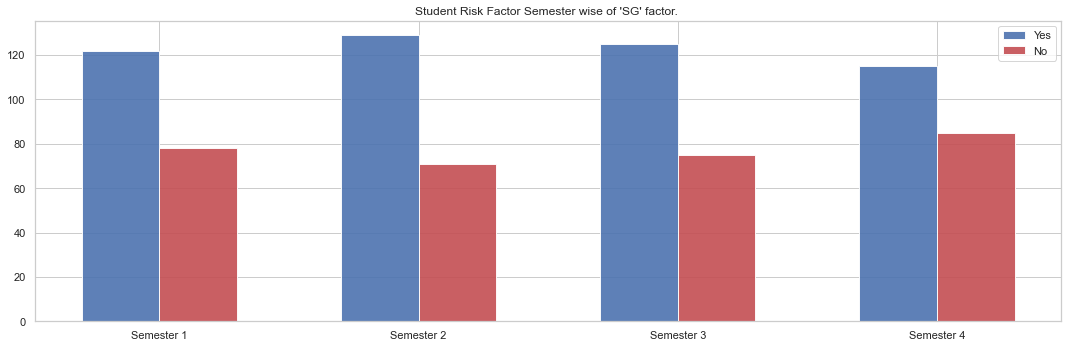

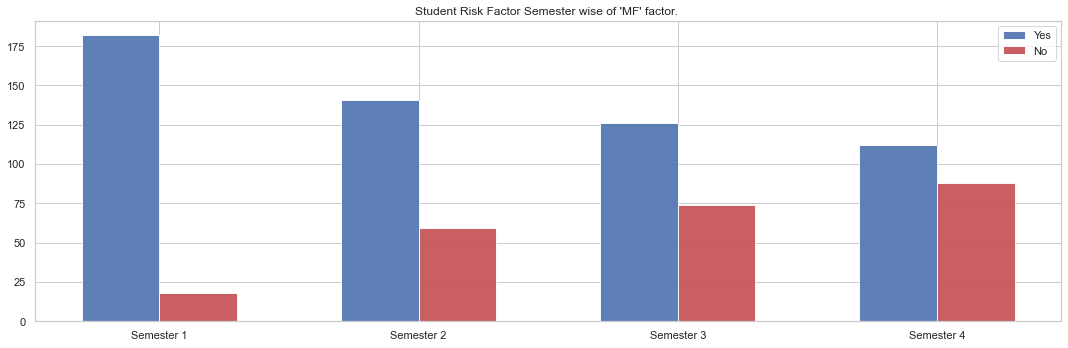

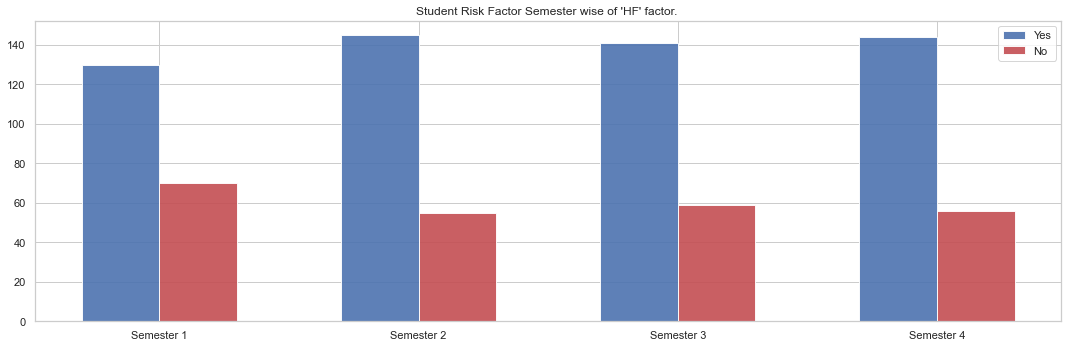

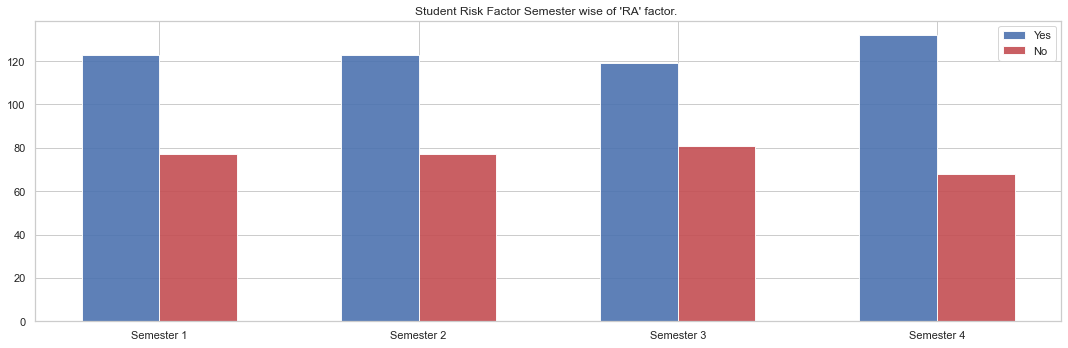

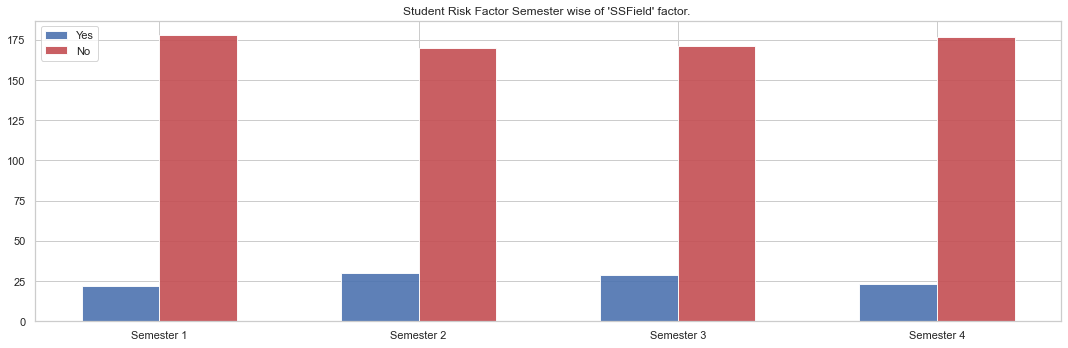

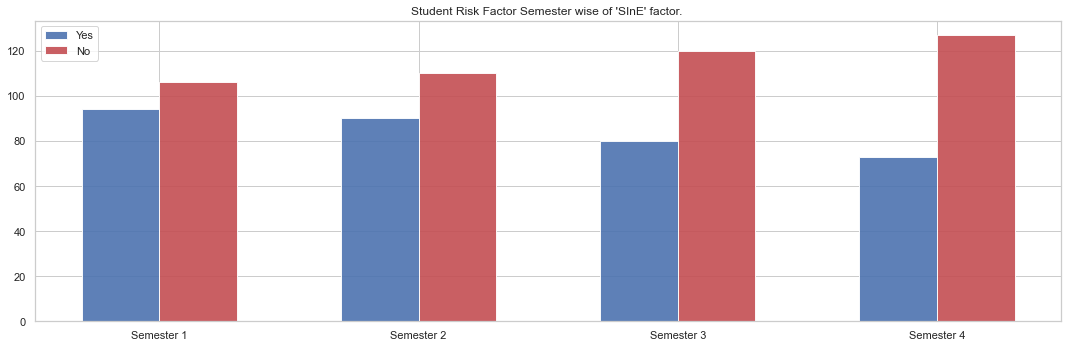

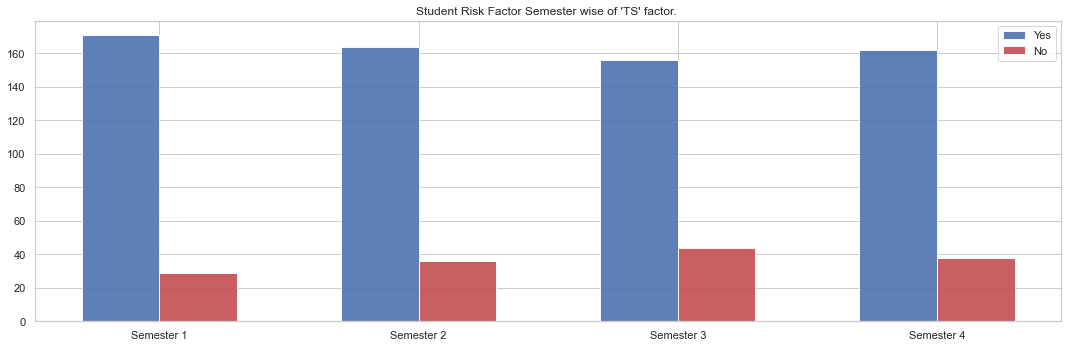

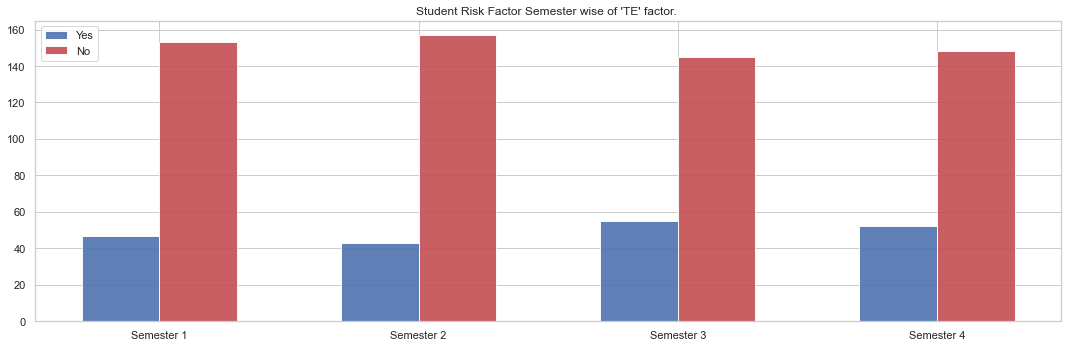

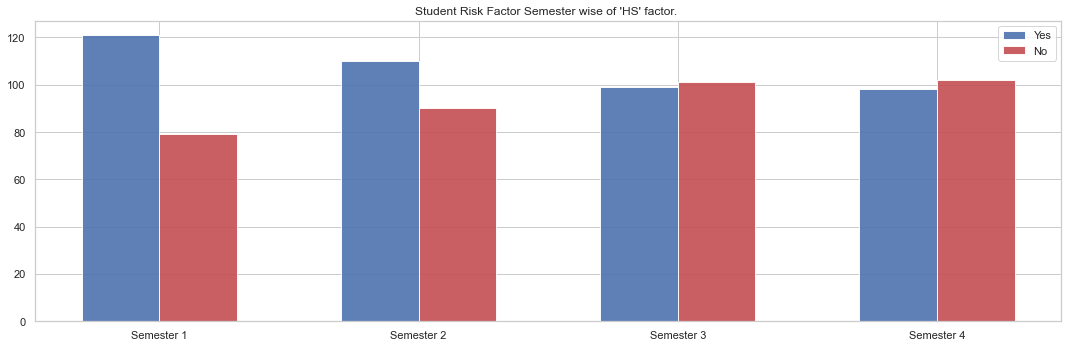

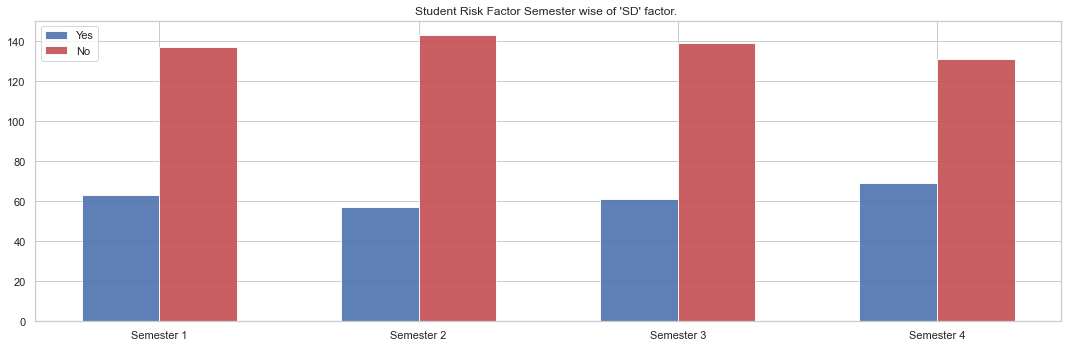

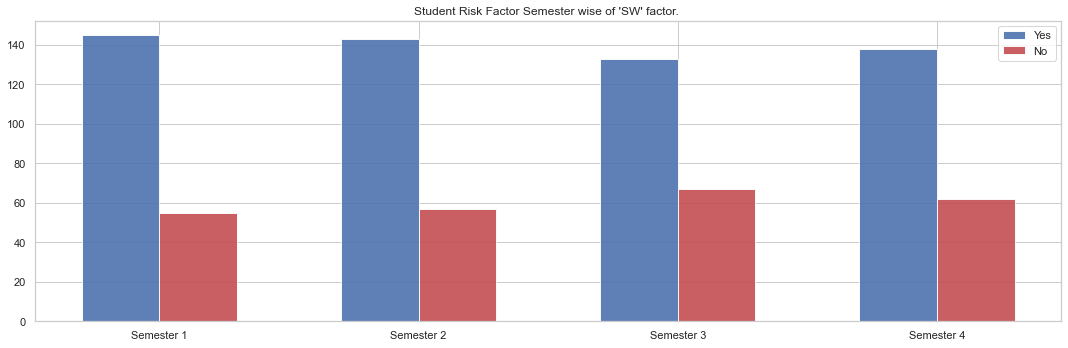

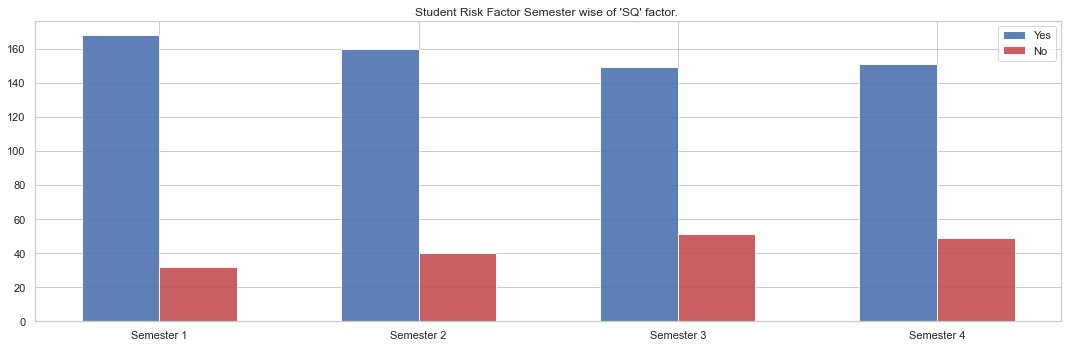

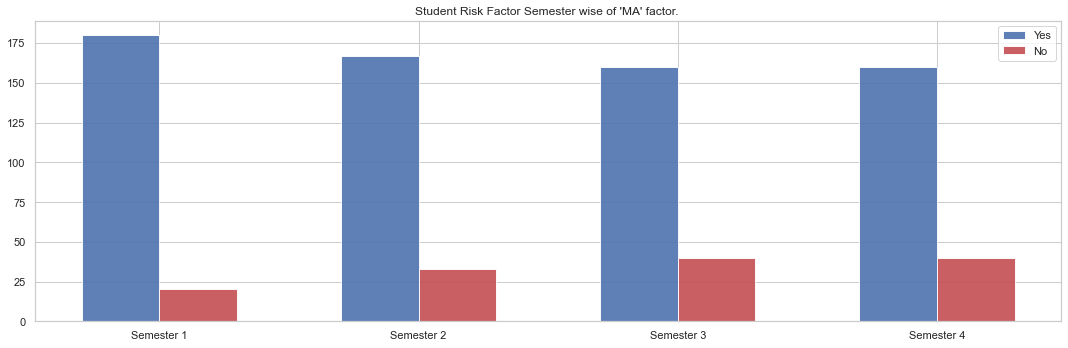

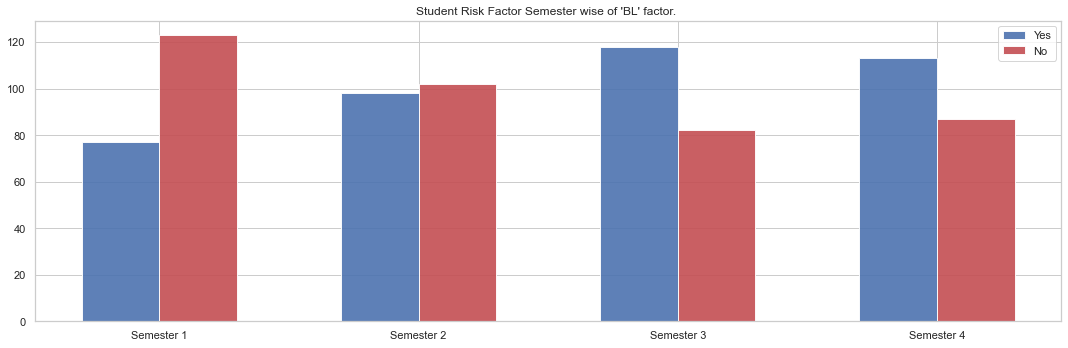

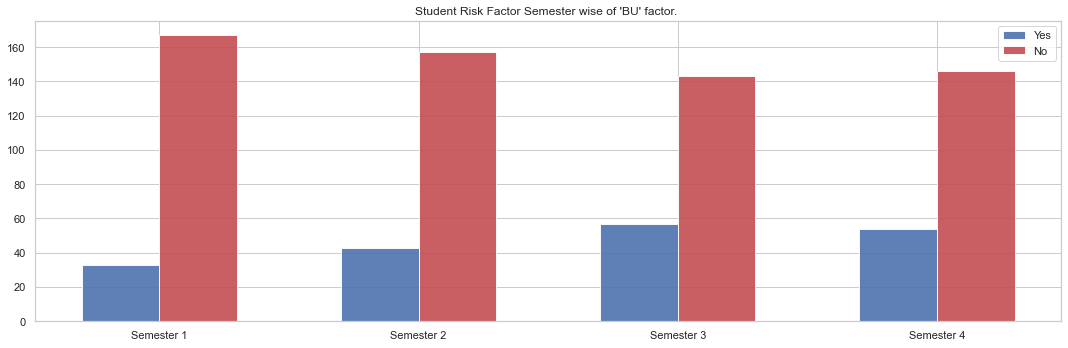

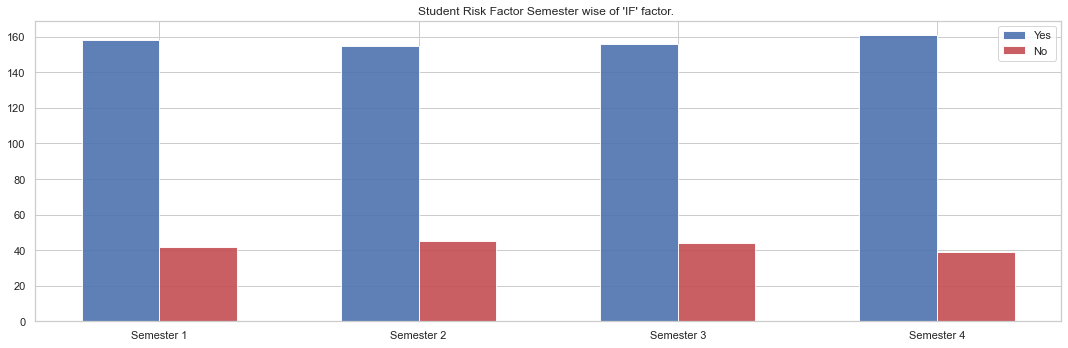

In [56]:
#Semester wise student factors visualization
for j in range(0, 25):
    i=j
    yes_values = []
    no_values = []
    
    for x in range(0, 4):
        Semester = newdata.iloc[:, i]
        i = i + 25
        #print(Semester)

        n_groups = 4
        y = Semester.value_counts()
        if y.index[0] == 'Yes':
            yes_values.append(y[0])
            no_values.append(y[1])
        else:
            no_values.append(y[0])
            yes_values.append(y[1])


    factor = y.name
    new_fac = factor[:-1]

    # create plot
    fig, ax = plt.subplots(figsize=(15,5))
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 0.9

    rects1 = plt.bar(index, yes_values, bar_width,
    alpha=opacity,
    color='b',
    label='Yes'
    )


    rects2 = plt.bar(index + bar_width, no_values, bar_width,
    alpha=opacity,
    color='r',
    label='No'
    )


    #plt.xlabel('Semester Wise')
    #plt.ylabel('Count')
    plt.legend()
    plt.title("Student Risk Factor Semester wise of '" + new_fac + "' factor. ")
    plt.xticks(index + 0.15, ('Semester 1', 'Semester 2','Semester 3','Semester 4'))
    plt.tight_layout()
    plt.show()

In [78]:
newdata1 = newdata.copy()

In [79]:
newdata1 = newdata1.replace('Yes', 1)
newdata1 = newdata1.replace('No', 0)

In [80]:
hostelite1 = newdata1['Hostelite1'].mean()*100
hostelite2 = newdata1['Hostelite2'].mean()*100
hostelite3 = newdata1['Hostelite3'].mean()*100
hostelite4 = newdata1['Hostelite4'].mean()*100

Personal_Issue1 = newdata1['PI1'].mean()*100
Personal_Issue2 = newdata1['PI2'].mean()*100
Personal_Issue3 = newdata1['PI3'].mean()*100
Personal_Issue4 = newdata1['PI4'].mean()*100

Home_Issue1 = newdata1['HI1'].mean()*100
Home_Issue2 = newdata1['HI2'].mean()*100
Home_Issue3 = newdata1['HI3'].mean()*100
Home_Issue4 = newdata1['HI4'].mean()*100

Make_New_Friends1 = newdata1['MF1'].mean()*100
Make_New_Friends2 = newdata1['MF2'].mean()*100
Make_New_Friends3 = newdata1['MF3'].mean()*100
Make_New_Friends4 = newdata1['MF4'].mean()*100

Elder_In_SameField1 = newdata1['SSField1'].mean()*100
Elder_In_SameField2 = newdata1['SSField2'].mean()*100
Elder_In_SameField3 = newdata1['SSField3'].mean()*100
Elder_In_SameField4 = newdata1['SSField4'].mean()*100

Elder_In_Education1 = newdata1['SInE1'].mean()*100
Elder_In_Education2 = newdata1['SInE2'].mean()*100
Elder_In_Education3 = newdata1['SInE3'].mean()*100
Elder_In_Education4 = newdata1['SInE3'].mean()*100

Guide_From_Senior1 = newdata1['HS1'].mean()*100
Guide_From_Senior2 = newdata1['HS2'].mean()*100
Guide_From_Senior3 = newdata1['HS3'].mean()*100
Guide_From_Senior4 = newdata1['HS4'].mean()*100

Study_Daily1 = newdata1['SD1'].mean()*100
Study_Daily2 = newdata1['SD2'].mean()*100
Study_Daily3 = newdata1['SD3'].mean()*100
Study_Daily4 = newdata1['SD4'].mean()*100

Study_Weekly1 = newdata1['SW1'].mean()*100
Study_Weekly2 = newdata1['SW2'].mean()*100
Study_Weekly3 = newdata1['SW3'].mean()*100
Study_Weekly4 = newdata1['SW4'].mean()*100

Internet_Home1 = newdata1['IF1'].mean()*100
Internet_Home2 = newdata1['IF2'].mean()*100
Internet_Home3 = newdata1['IF3'].mean()*100
Internet_Home4 = newdata1['IF4'].mean()*100

In [81]:
a = (hostelite1, Personal_Issue1, Home_Issue1, Make_New_Friends1, Elder_In_SameField1)
b = (hostelite2, Personal_Issue2, Home_Issue2, Make_New_Friends2, Elder_In_SameField2)
c = (hostelite3, Personal_Issue3, Home_Issue3, Make_New_Friends3, Elder_In_SameField3)
d = (hostelite4, Personal_Issue4, Home_Issue4, Make_New_Friends4, Elder_In_SameField4)

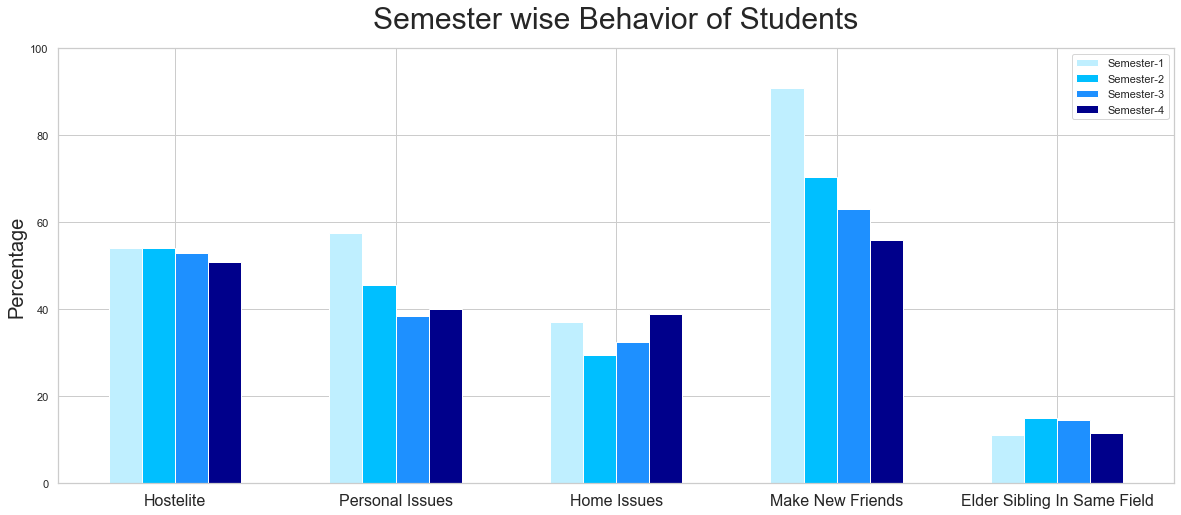

In [112]:
N = len(a)

color1 = plt.cm.Blues(np.linspace(0.25, 1, 4)) 

# Set plot parameters
fig, ax = plt.subplots(figsize=(20,8))
width = 0.15 # width of bar
ind = np.arange(N)

ax.bar(ind, a, width, color='#BFEFFF')
ax.bar(ind + width, b, width, color='#00BFFF') 
ax.bar(ind + width*2, c, width, color='#1E90FF') 
ax.bar(ind + width*3, d, width, color='#00008B') 

x_labels = ['Hostelite', 'Personal Issues', 'Home Issues', 'Make New Friends', 'Elder Sibling In Same Field']
y_labels = [0,20,40,60,80,100]


ax.set_title('Semester wise Behavior of Students', fontsize=30, pad=20)
ax.set_ylim(0,100)
ax.set_ylabel('Percentage', fontsize=20)
#ax.set_yticklabels(y_labels, fontsize=16)

ax.set_xticks(ind + width*1.5)
ax.set_xticklabels(x_labels, rotation = 0, fontsize=16)
ax.legend(['Semester-1','Semester-2','Semester-3','Semester-4'])
#plt.savefig("Exp_Screenshots/Semester wise Behavior of Students(1).png", bbox_inches = 'tight')
plt.show()

In [113]:
e = (Elder_In_Education1, Guide_From_Senior1, Study_Daily1, Study_Weekly1, Internet_Home1)
f = (Elder_In_Education2, Guide_From_Senior2, Study_Daily2, Study_Weekly2, Internet_Home2)
g = (Elder_In_Education3, Guide_From_Senior3, Study_Daily3, Study_Weekly3, Internet_Home3)
h = (Elder_In_Education4, Guide_From_Senior4, Study_Daily4, Study_Weekly4, Internet_Home4)

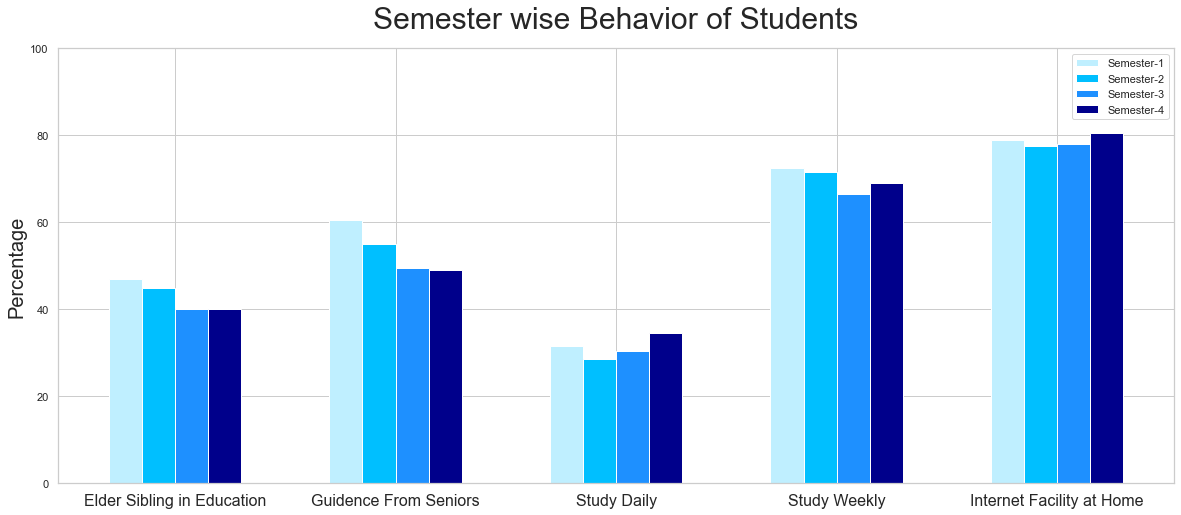

In [118]:
N = len(e)

color1 = plt.cm.Blues(np.linspace(0.25, 1, 4)) 

# Set plot parameters
fig, ax = plt.subplots(figsize=(20,8))
width = 0.15 # width of bar
ind = np.arange(N)

ax.bar(ind, e, width, color='#BFEFFF')
ax.bar(ind + width, f, width, color='#00BFFF') 
ax.bar(ind + width*2, g, width, color='#1E90FF') 
ax.bar(ind + width*3, h, width, color='#00008B') 

x_labels = ['Elder Sibling in Education', 'Guidence From Seniors', 'Study Daily', 'Study Weekly', 'Internet Facility at Home']

ax.set_title('Semester wise Behavior of Students', fontsize=30, pad=20)
ax.set_ylim(0,100)
#ax.set_yticklabels(fontsize=16)
ax.set_ylabel('Percentage', fontsize=20)

ax.set_xticks(ind + width*1.5)
ax.set_xticklabels(x_labels, rotation = 0, fontsize=16)
ax.legend(['Semester-1','Semester-2','Semester-3','Semester-4'])
plt.savefig("Exp_Screenshots/Semester wise Behavior of Students(2).png", bbox_inches = 'tight')
plt.show()

# Data Analysis of Main Data 800 Records

In [49]:
data1.head(5)

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Class
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,Bad
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,Bad
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Average
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,Bad
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,Bad


In [50]:
male=data1['Gender'].mean()*100
female=100-male

self_employed=data1['SM'].mean()*100
Not_self_employed=100-self_employed

married=data1['MS'].mean()*100
single=100-married

public=data1['TS'].mean()*100
private=100-public

public1=data1['TC'].mean()*100
private1=100-public1

urban=data1['GS'].mean()*100
rural=100-urban

urban1=data1['GC'].mean()*100
rural1=100-urban1

hostelite=data1['H/D'].mean()*100
day_scholar=100-hostelite

ssc = data1['Matic'].mean()*100
o_level = 100-ssc

hssc = data1['Intermediate'].mean()*100
a_level = 100-hssc


Batch_f13 = data1['Batch_f13'].mean()*100
Batch_f14 = data1['Batch_f14'].mean()*100
Batch_f15 = data1['Batch_f15'].mean()*100
Batch_f16 = data1['Batch_f16'].mean()*100
Batch_f17 = data1['Batch_f17'].mean()*100
Batch_f18 = data1['Batch_f18'].mean()*100


guard_father = data1['GU_Father'].mean()*100
guard_mother = data1['GU_Mother'].mean()*100
guard_other = data1['GU_Others'].mean()*100


gurad_study_12 = data1['EG_12 Years of Study'].mean()*100
gurad_study_14 = data1['EG_14 Years of Study'].mean()*100
gurad_study_16 = data1['EG_16 Years of Study'].mean()*100
gurad_study_18 = data1['EG_18 Years of Study'].mean()*100
gurad_study_More = data1['EG_More than 18 years of study'].mean()*100

society_status_1 = data1['SS_1'].mean()*100
society_status_2 = data1['SS_2'].mean()*100
society_status_3 = data1['SS_3'].mean()*100
society_status_4 = data1['SS_4'].mean()*100
society_status_5 = data1['SS_5'].mean()*100

In [52]:
X = (male, self_employed, married, public, public1, urban, urban1, hostelite, ssc, hssc)
y = (female, Not_self_employed, single, private, private1, rural, rural1, day_scholar, o_level, a_level)

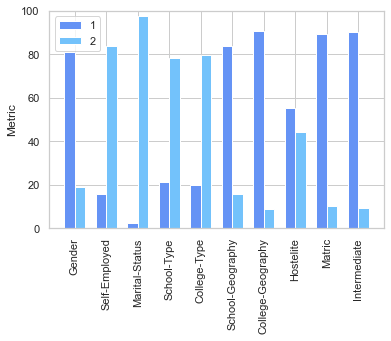

In [53]:
N = len(X)

# Set plot parameters
fig, ax = plt.subplots()
width = 0.33 # width of bar
ind = np.arange(N)

ax.bar(ind, X, width, color='#6593F5')
ax.bar(ind + width, y, width, color='#73C2FB') # color='#6593F5' color='#73C2F

x_labels = ['Gender', 'Self-Employed', 'Marital-Status', 'School-Type', 'College-Type', 'School-Geography',
           'College-Geography', 'Hostelite', 'Matric', 'Intermediate']

ax.set_ylabel('Metric')
ax.set_ylim(0,100)
ax.set_xticks(ind + width/2)
ax.set_xticklabels(x_labels, rotation = 90)
ax.legend(['1','2'])

plt.show()

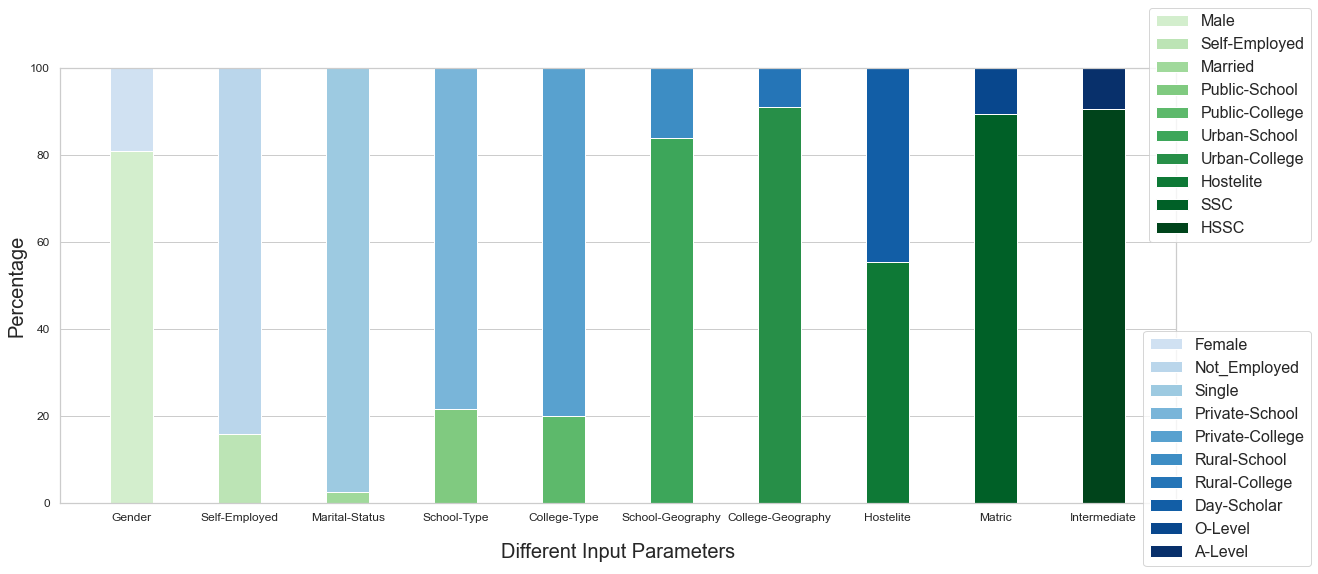

In [65]:
N=10
color1 = plt.cm.Greens(np.linspace(0.2, 1, 10)) 
color2 = plt.cm.Blues(np.linspace(0.2, 1, 10))

ind = np.arange(N)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
ax1 = axes

b1_list = []
for row in range(len(X)):
    b1_list.append(ax1.bar(ind[row], X[row], width=0.4,  color=color1[row]))

b2_list = []
for row in range(len(y)):
    b2_list.append(ax1.bar(ind[row], y[row], width=0.4, bottom= X[row], color=color2[row]))
    y_offset_cost = X[row]



x_labels = ['Gender', 'Self-Employed', 'Marital-Status', 'School-Type', 'College-Type', 'School-Geography',
           'College-Geography', 'Hostelite', 'Matric', 'Intermediate']

x_legends = ['Male','Self-Employed','Married','Public-School','Public-College','Urban-School','Urban-College',
             'Hostelite','SSC','HSSC']

y_legends = ['Female','Not_Employed','Single','Private-School','Private-College','Rural-School','Rural-College',
             'Day-Scholar','O-Level','A-Level']

fig.legend(b1_list, x_legends, fontsize=16, loc="upper right")
fig.legend(b2_list, y_legends, fontsize=16, loc="lower right")

plt.ylim(0,100)
plt.yticks(fontsize=12)

plt.ylabel('Percentage', fontsize=20)
plt.xlabel('Different Input Parameters', fontsize=20, labelpad=20)
#plt.title('Different Input Parameters', fontsize=30, pad=20)
plt.xticks(ind, x_labels, rotation = 0, fontsize=12)
plt.savefig("Exp_Screenshots/Different Input Parameters(new).png", bbox_inches = 'tight')
plt.show()

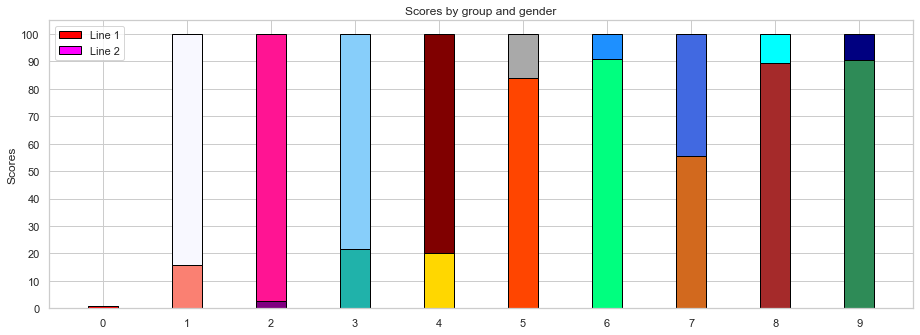

In [63]:
N = 10

ind = np.arange(N) # the x locations for the groups
width = 0.35

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, X, width, color=['#FF0000', '#FA8072', '#800080', '#20B2AA', '#FFD700', '#FF4500', '#00FF7F', '#D2691E', '#A52A2A', '#2E8B57'], edgecolor='black')
ax.bar(ind, y, width,bottom=X, color=['#FF00FF', '#F8F8FF', '#FF1493', '#87CEFA', '#800000', '#A9A9A9', '#1E90FF', '#4169E1', '#00FFFF', '#000080'], edgecolor='black')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
#ax.set_xticklabels(['two', 'four','six', 'eight', 'ten','two', 'four','six', 'eight', 'ten'])
ax.set_yticks(np.arange(0, 110, 10))
#ax.legend(labels=['Men', 'Women','new','what'])

ax.legend({'Line 1','Line 2','Line 3', '4'})
plt.show()

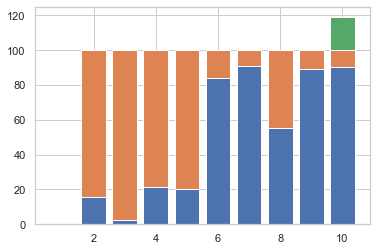

In [64]:
plt.bar([1,2,3,4,5,6,7,8,9,10], X)
plt.bar([1,2,3,4,5,6,7,8,9,10], y, bottom = X)
plt.bar([10], [19.023779724655824], bottom = [9.51 + 90.48])

plt.show()

In [65]:
X1 = (mean_male, self_employed, married, public, public1, urban, urban1, hostelite, ssc, hssc, Batch_f13, guard_father, gurad_study_12, society_status_1)
y1 = (mean_female, Not_self_employed, single, private, private1, rural, rural1, day_scholar, o_level, a_level, Batch_f14, guard_mother, gurad_study_14, society_status_2)
a1 = (Batch_f15, guard_other, gurad_study_16, society_status_3)
b1 = (Batch_f16, gurad_study_18, society_status_4)
c1 = (Batch_f17, gurad_study_More, society_status_5)
d1 = (Batch_f18)

In [66]:
[X1],[y1],[a1],[b1],[c1],[d1]

([(0.8097622027534418,
   15.894868585732166,
   2.5031289111389237,
   21.526908635794744,
   20.02503128911139,
   83.97997496871089,
   90.98873591989988,
   55.444305381727155,
   89.48685857321652,
   90.4881101376721,
   1.376720901126408,
   85.48185231539425,
   35.04380475594493,
   4.005006257822278)],
 [(0.1902377972465582,
   84.10513141426783,
   97.49687108886107,
   78.47309136420526,
   79.97496871088862,
   16.02002503128911,
   9.01126408010012,
   44.555694618272845,
   10.513141426783477,
   9.511889862327905,
   0.5006257822277848,
   12.015018773466833,
   26.032540675844807,
   10.012515644555695)],
 [(1.5018773466833542,
   2.5031289111389237,
   20.02503128911139,
   40.05006257822278)],
 [(12.51564455569462, 10.888610763454318, 36.42052565707134)],
 [(36.545682102628284, 8.010012515644556, 9.51188986232791)],
 [47.559449311639554])

In [67]:
#print multiple values from list 
from operator import itemgetter
X1_b = itemgetter(10, 12, 13)(X1)
y1_b = itemgetter(10, 12, 13)(y1)
a1_b = itemgetter(0, 2, 3)(a1)
a1_b

(1.5018773466833542, 20.02503128911139, 40.05006257822278)

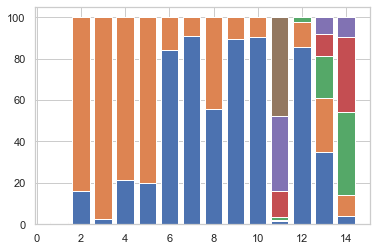

In [68]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14], X1)
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14], y1, bottom = X1)
plt.bar([11,12,13,14], a1[:4], bottom = [a + b for a, b in zip(X1[10:14], y1[10:14])])
plt.bar([11,13,14], b1[:3], bottom = [a + b + c for a, b, c in zip(X1_b, y1_b, a1_b)])
plt.bar([11,13,14], c1[:3], bottom = [a + b + c + d for a, b, c, d in zip(X1_b, y1_b, a1_b, b1[:3])])
plt.bar([11], d1, bottom = [a + b + c + d + e for a, b, c, d, e in zip([X1[10]], [y1[10]], [a1[0]], [b1[0]], [c1[0]])])

plt.show()

In [69]:
plt.cm

<module 'matplotlib.cm' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\cm.py'>

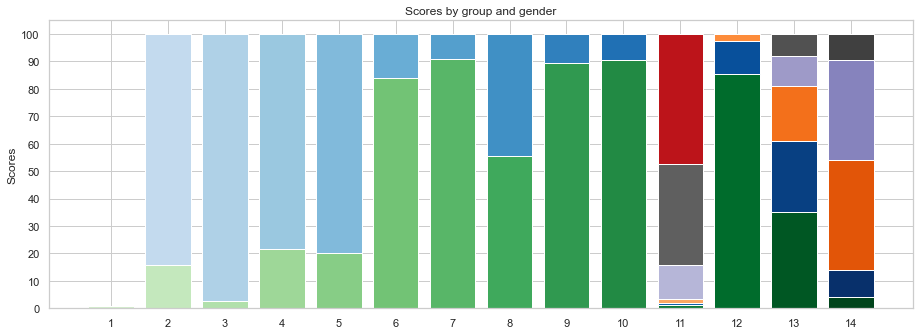

In [70]:
N = 10

ind = np.arange(N) # the x locations for the groups
width = 0.35

color1 = plt.cm.Greens(np.linspace(0.2, 1, 14)) 
color2 = plt.cm.Blues(np.linspace(0.2, 1, 14))
color3 = plt.cm.Oranges(np.linspace(0.4, 1, 7)) 
color4 = plt.cm.Purples(np.linspace(0.4, 1, 7))
color5 = plt.cm.Greys(np.linspace(0.7, 1, 7)) 
color6 = plt.cm.Reds(np.linspace(0.8, 1, 7)) 

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])

ax.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14], X1, color=color1)
ax.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14], y1, bottom = X1, color=color2)
ax.bar([11,12,13,14], a1[:4], bottom = [a + b for a, b in zip(X1[10:14], y1[10:14])], color=color3)
ax.bar([11,13,14], b1[:3], bottom = [a + b + c for a, b, c in zip(X1_b, y1_b, a1_b)], color=color4)
ax.bar([11,13,14], c1[:3], bottom = [a + b + c + d for a, b, c, d in zip(X1_b, y1_b, a1_b, b1[:3])],color=color5)
ax.bar([11], d1, bottom = [a + b + c + d + e for a, b, c, d, e in zip([X1[10]], [y1[10]], [a1[0]], [b1[0]], [c1[0]])], color = color6)

#ax.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14], X1, color=['#FF0000', '#FA8072', '#800080', '#20B2AA', '#FFD700', '#FF4500', '#00FF7F', '#D2691E', '#A52A2A', '#2E8B57', '#6593F5', '#73C2FB', '#6593F5', '#73C2FB'], edgecolor='black')
#ax.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14], y1, bottom = X1, color=['#FF00FF', '#F8F8FF', '#FF1493', '#87CEFA', '#800000', '#A9A9A9', '#1E90FF', '#4169E1', '#00FFFF', '#000080', '#6593F5', '#73C2FB', '#6593F5', '#73C2FB'], edgecolor='black')
#ax.bar([11,12,13,14], a1[:4], bottom = [a + b for a, b in zip(X1[10:14], y1[10:14])], color=['#FF0000', '#FA8072', '#800080', '#20B2AA'], edgecolor='black')
#ax.bar([11,13,14], b1[:3], bottom = [a + b + c for a, b, c in zip(X1_b, y1_b, a1_b)], color=['#FF1493', '#F8F8FF', '#FF00FF' ], edgecolor='black')
#ax.bar([11,13,14], c1[:3], bottom = [a + b + c + d for a, b, c, d in zip(X1_b, y1_b, a1_b, b1[:3])],color=['#4169E1', '#1E90FF', '#A9A9A9'], edgecolor='black')
#ax.bar([11], d1, bottom = [a + b + c + d + e for a, b, c, d, e in zip([X1[10]], [y1[10]], [a1[0]], [b1[0]], [c1[0]])], color = ['#73C2FB'], edgecolor='black')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
#ax.set_xticklabels(['two', 'four','six', 'eight', 'ten','two', 'four','six', 'eight', 'ten'])
ax.set_yticks(np.arange(0, 110, 10))
#ax.legend(labels=['Men', 'Women','new','what'])

#ax.legend({'Line 1','Line 2','Line 3', '4'})
plt.show()

### Records Analysis

In [71]:
dataset.columns

Index(['Batch', 'SM', 'MS', 'ES', 'EC', 'TS', 'TC', 'GS', 'GC', 'GU', 'EG',
       'OG', 'GH', 'SS', 'H/D', 'Semester', 'Hostelite-S', 'SM-S', 'MS-S',
       'OnBus-S', 'OnCar-S', 'OnBike-S', 'OnLocalBus-S', 'PI-S', 'HI-S',
       'SG-S', 'MF-S', 'HF-S', 'RA-S', 'SSField-S', 'SInE-S', 'TS-S', 'TE-S',
       'HS-S', 'SD-S', 'SW-S', 'SQ-S', 'MA-S', 'BL-S', 'BU-S', 'IF-S',
       'Student_Campus', 'City', 'Student_Lat', 'Std_Long',
       'Student_Home_Uni_Distance(km)', 'Status', 'Gender', 'Matic', 'Board',
       'Obtained', 'Total', 'Intermediate', 'Board2', 'Obtained2', 'Total2',
       'SGPA-Semester', 'CGPA-Semester', 'Matric-Marks-Bin',
       'Intermediate-Marks-Bin', 'Att_CreditHrs-Semester-Bin',
       'Earn_CreditHrs-Semester-Bin', 'Age', 'Class'],
      dtype='object')

In [72]:
groupby_cgp = dataset.groupby('Class')

In [73]:
dataset['Class'].unique()

array(['Bad', 'Average', 'Good'], dtype=object)

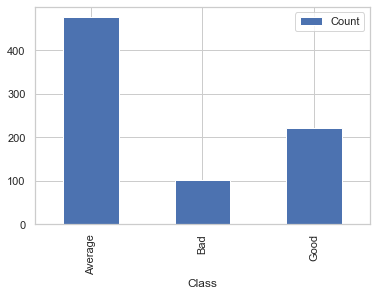

In [74]:
table=pd.crosstab(index=dataset["Class"], columns="count")
table.plot(kind="bar")
plt.legend(['Count'],loc=1)
plt.show()

# Data Describe

In [55]:
data1.describe()

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,...,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,0.158949,0.025031,0.215269,0.200250,0.839800,0.909887,0.754693,0.554443,0.529412,0.072591,...,0.005006,0.030038,0.125156,0.280350,0.290363,0.153942,0.065081,0.030038,0.010013,0.010013
std,0.365857,0.156318,0.411266,0.400438,0.367021,0.286522,0.430538,0.497338,0.499447,0.259626,...,0.070622,0.170798,0.331103,0.449452,0.454214,0.361120,0.246824,0.170798,0.099623,0.099623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Researchpy

In [5]:
import researchpy as rp

In [49]:
rp.summary_cont(data2)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SM,799.0,0.1589,0.3659,0.0129,0.1335,0.1844
1,MS,799.0,0.0250,0.1563,0.0055,0.0142,0.0359
2,TS,799.0,0.2153,0.4113,0.0145,0.1867,0.2438
3,TC,799.0,0.2003,0.4004,0.0142,0.1724,0.2281
4,GS,799.0,0.8398,0.3670,0.0130,0.8143,0.8653
...,...,...,...,...,...,...,...
110,Age_23,799.0,0.1539,0.3611,0.0128,0.1289,0.1790
111,Age_24,799.0,0.0651,0.2468,0.0087,0.0479,0.0822
112,Age_25,799.0,0.0300,0.1708,0.0060,0.0182,0.0419
113,Age_26,799.0,0.0100,0.0996,0.0035,0.0031,0.0169


# Correlation

In [54]:
print(dataset.shape)
print(data1.shape)
print(data2.shape)

(799, 64)
(799, 116)
(799, 115)


In [55]:
data3 = data1.copy()

In [56]:
size_mapping = {"Good": 2, "Average": 3, "Bad": 4}
data3['Class'] = data1['Class'].map(size_mapping)
data3.head(5)

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Class
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,4
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,3
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,4
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,4


In [57]:
df_corr = data3.corr()
df_corr

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Class
SM,1.000000,-0.069657,-0.061124,0.056182,-0.034106,-0.102278,-0.006731,0.059130,0.087540,0.313738,...,-0.076502,0.007800,-0.145361,0.043700,0.070656,-0.003682,0.003715,0.093807,0.093807,0.104748
MS,-0.069657,1.000000,-0.083922,-0.080178,0.069983,0.050425,0.091351,-0.049789,-0.089696,0.047804,...,-0.028197,-0.059211,-0.098768,0.034822,0.109246,-0.042275,0.159547,-0.016114,-0.016114,-0.116926
TS,-0.061124,-0.083922,1.000000,0.316215,-0.202947,-0.047862,-0.239261,-0.045118,-0.043064,-0.099588,...,0.050550,-0.006236,0.004368,-0.024342,0.012841,0.059330,-0.092169,-0.052673,0.069669,0.017819
TC,0.056182,-0.080178,0.316215,1.000000,-0.020190,-0.060966,-0.005458,0.146542,0.158486,0.028753,...,-0.088057,0.007464,-0.084403,0.054168,0.029197,0.070836,-0.014768,-0.050323,0.075327,0.029496
GS,-0.034106,0.069983,-0.202947,-0.020190,1.000000,0.672870,0.607473,-0.144384,-0.090479,-0.009316,...,0.076860,-0.006515,0.085892,-0.160419,0.035027,0.004571,0.076860,0.043924,-0.093167,-0.011393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Age_24,-0.003682,-0.042275,0.059330,0.070836,0.004571,0.083031,0.008914,0.073184,0.075941,-0.073815,...,-0.046430,-0.097499,-0.162635,-0.172879,-0.112544,1.000000,-0.046430,-0.026534,-0.026534,0.121032
Age_25,0.003715,0.159547,-0.092169,-0.014768,0.076860,0.055380,0.100328,0.098743,0.107152,0.063805,...,-0.030968,-0.065030,-0.108474,-0.115307,-0.075064,-0.046430,1.000000,-0.017697,-0.017697,0.042402
Age_26,0.093807,-0.016114,-0.052673,-0.050323,0.043924,0.031649,0.057336,-0.112185,-0.081482,-0.028136,...,-0.017697,-0.037163,-0.061991,-0.065896,-0.042898,-0.026534,-0.017697,1.000000,-0.010114,0.105581
Age_27,0.093807,-0.016114,0.069669,0.075327,-0.093167,-0.319564,-0.059530,0.090153,0.094816,0.068763,...,-0.017697,-0.037163,-0.061991,-0.065896,-0.042898,-0.026534,-0.017697,-0.010114,1.000000,0.024232


In [58]:
df_corr['Class']

SM        0.104748
MS       -0.116926
TS        0.017819
TC        0.029496
GS       -0.011393
            ...   
Age_24    0.121032
Age_25    0.042402
Age_26    0.105581
Age_27    0.024232
Class     1.000000
Name: Class, Length: 116, dtype: float64

<AxesSubplot:>

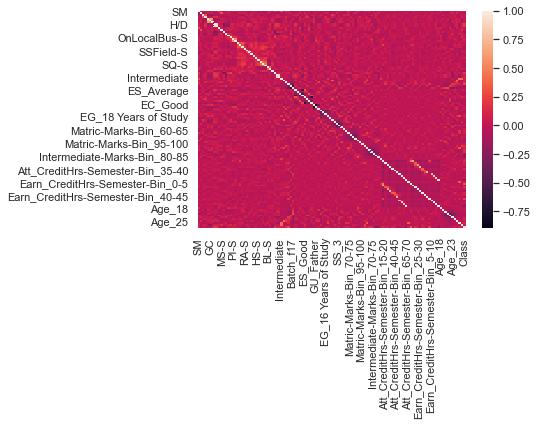

In [98]:
sns.heatmap(data3.corr())

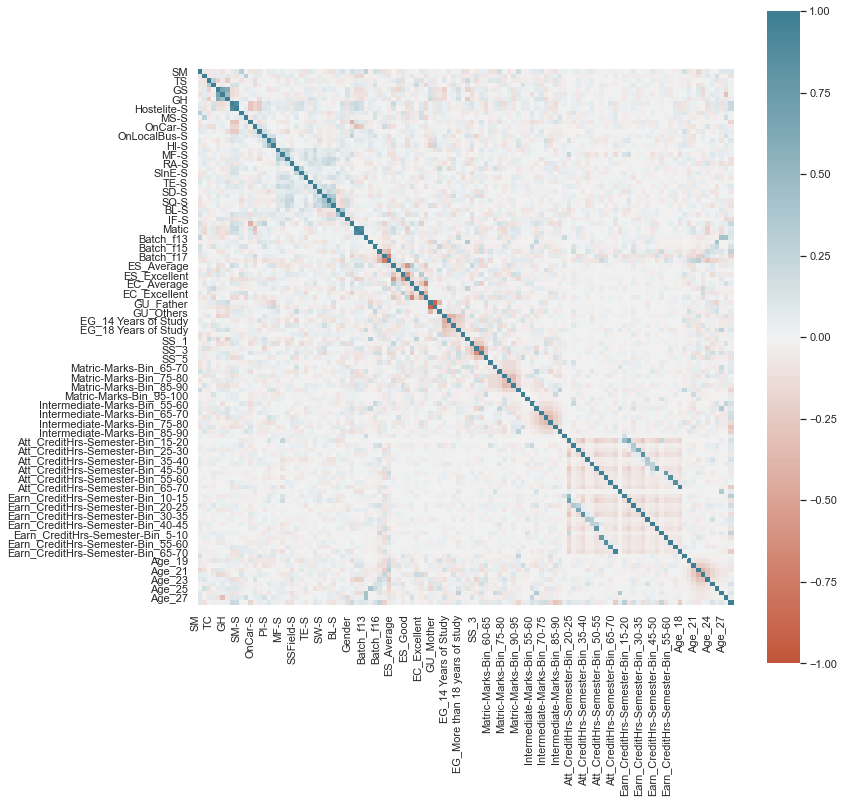

In [105]:
corr = data3.corr()
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    #size(data3) = abs(corr(data3))
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    
);

In [69]:
#df_corr['Class'].to_csv('correlation.csv')

# Confidance Interval

In [76]:
import scipy.stats as stats

In [60]:
point_estimates_dict = {}
Confidence_interval_dict = {}

In [61]:
def Point_Estimates_Confidence_interval(column,qvalue):
    if data3[column].dtype==np.int64:
        no_of_yes=np.sum(data3[column]==1)
        print("No of Yes in",column,no_of_yes)
        point_Estimate=no_of_yes/len(data3)
    else:
        point_Estimate=data3[column].mean()
    
    print('Point Estimate of',column,":",point_Estimate)
    name='Point Estimate of '+column
    point_estimates_dict[name] = point_Estimate

    sample_mean=point_Estimate
    z_critical = stats.norm.ppf(q = qvalue)  # Get the z-critical value*

    print("z-critical value:",z_critical)              # Check the z-critical value
    if data3[column].dtype==np.int64:
        pop_stdev =math.sqrt( point_Estimate*((len(data3)-no_of_yes)/len(data3) )) # Get the population standard deviation
    else:
        pop_stdev =data3[column].std() # Get the population standard deviation                    
    
    print("Standard deviation of",column,":",pop_stdev) 
    margin_of_error = z_critical * (pop_stdev/math.sqrt(len(data3)))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  

    print("Confidence interval of ",column,":",confidence_interval)
    name2='Confidence interval of '+column
    Confidence_interval_dict[name2] = confidence_interval
    print("  ")
    print("  ")

In [62]:
list=data3.columns
for i in list:
    Point_Estimates_Confidence_interval(i,0.95)

No of Yes in SM 127
Point Estimate of SM : 0.15894868585732166
z-critical value: 1.6448536269514722
Standard deviation of SM : 0.3656282280152233
Confidence interval of  SM : (0.1376725093375908, 0.18022486237705254)
  
  
No of Yes in MS 20
Point Estimate of MS : 0.025031289111389236
z-critical value: 1.6448536269514722
Standard deviation of MS : 0.15622011290743354
Confidence interval of  MS : (0.015940725409036214, 0.03412185281374226)
  
  
No of Yes in TS 172
Point Estimate of TS : 0.21526908635794745
z-critical value: 1.6448536269514722
Standard deviation of TS : 0.4110088889751194
Confidence interval of  TS : (0.1913521756738823, 0.2391859970420126)
  
  
No of Yes in TC 160
Point Estimate of TC : 0.2002503128911139
z-critical value: 1.6448536269514722
Standard deviation of TC : 0.4001876123496639
Confidence interval of  TC : (0.1769631002828834, 0.22353752549934439)
  
  
No of Yes in GS 671
Point Estimate of GS : 0.8397997496871089
z-critical value: 1.6448536269514722
Standard

No of Yes in SS_5 76
Point Estimate of SS_5 : 0.0951188986232791
z-critical value: 1.6448536269514722
Standard deviation of SS_5 : 0.2933790956219844
Confidence interval of  SS_5 : (0.07804695245671438, 0.11219084478984383)
  
  
No of Yes in Matric-Marks-Bin_60-65 40
Point Estimate of Matric-Marks-Bin_60-65 : 0.05006257822277847
z-critical value: 1.6448536269514722
Standard deviation of Matric-Marks-Bin_60-65 : 0.21807410778097122
Confidence interval of  Matric-Marks-Bin_60-65 : (0.03737268489392538, 0.06275247155163156)
  
  
No of Yes in Matric-Marks-Bin_65-70 44
Point Estimate of Matric-Marks-Bin_65-70 : 0.05506883604505632
z-critical value: 1.6448536269514722
Standard deviation of Matric-Marks-Bin_65-70 : 0.22811457503127464
Confidence interval of  Matric-Marks-Bin_65-70 : (0.041794680514355025, 0.06834299157575763)
  
  
No of Yes in Matric-Marks-Bin_70-75 68
Point Estimate of Matric-Marks-Bin_70-75 : 0.0851063829787234
z-critical value: 1.6448536269514722
Standard deviation of M

No of Yes in Earn_CreditHrs-Semester-Bin_40-45 39
Point Estimate of Earn_CreditHrs-Semester-Bin_40-45 : 0.04881101376720901
z-critical value: 1.6448536269514722
Standard deviation of Earn_CreditHrs-Semester-Bin_40-45 : 0.2154727330829271
Confidence interval of  Earn_CreditHrs-Semester-Bin_40-45 : (0.03627249635254612, 0.061349531181871905)
  
  
No of Yes in Earn_CreditHrs-Semester-Bin_45-50 100
Point Estimate of Earn_CreditHrs-Semester-Bin_45-50 : 0.1251564455569462
z-critical value: 1.6448536269514722
Standard deviation of Earn_CreditHrs-Semester-Bin_45-50 : 0.33089622193747903
Confidence interval of  Earn_CreditHrs-Semester-Bin_45-50 : (0.10590135011239883, 0.14441154100149353)
  
  
No of Yes in Earn_CreditHrs-Semester-Bin_5-10 15
Point Estimate of Earn_CreditHrs-Semester-Bin_5-10 : 0.01877346683354193
z-critical value: 1.6448536269514722
Standard deviation of Earn_CreditHrs-Semester-Bin_5-10 : 0.135724072207519
Confidence interval of  Earn_CreditHrs-Semester-Bin_5-10 : (0.01087558

In [63]:
Confidence_interval_dict

{'Confidence interval of SM': (0.1376725093375908, 0.18022486237705254),
 'Confidence interval of MS': (0.015940725409036214, 0.03412185281374226),
 'Confidence interval of TS': (0.1913521756738823, 0.2391859970420126),
 'Confidence interval of TC': (0.1769631002828834, 0.22353752549934439),
 'Confidence interval of GS': (0.8184558715454866, 0.8611436278287312),
 'Confidence interval of GC': (0.8932248446562223, 0.9265498737417752),
 'Confidence interval of GH': (0.7296557042895623, 0.7797310291272087),
 'Confidence interval of H/D': (0.5255206790068238, 0.5833654286277193),
 'Confidence interval of Hostelite-S': (0.5003667772013863,
  0.5584567522103784),
 'Confidence interval of SM-S': (0.057492364090379035, 0.08768911275567852),
 'Confidence interval of MS-S': (0.025412298540156093, 0.04717843988287269),
 'Confidence interval of OnBus-S': (0.3831259619863979, 0.4404034497783079),
 'Confidence interval of OnCar-S': (0.15190842706928914, 0.19602649157902124),
 'Confidence interval of 

In [64]:
point_estimates_dict

{'Point Estimate of SM': 0.15894868585732166,
 'Point Estimate of MS': 0.025031289111389236,
 'Point Estimate of TS': 0.21526908635794745,
 'Point Estimate of TC': 0.2002503128911139,
 'Point Estimate of GS': 0.8397997496871089,
 'Point Estimate of GC': 0.9098873591989988,
 'Point Estimate of GH': 0.7546933667083855,
 'Point Estimate of H/D': 0.5544430538172715,
 'Point Estimate of Hostelite-S': 0.5294117647058824,
 'Point Estimate of SM-S': 0.07259073842302878,
 'Point Estimate of MS-S': 0.03629536921151439,
 'Point Estimate of OnBus-S': 0.4117647058823529,
 'Point Estimate of OnCar-S': 0.1739674593241552,
 'Point Estimate of OnBike-S': 0.18648310387984982,
 'Point Estimate of OnLocalBus-S': 0.3053817271589487,
 'Point Estimate of PI-S': 0.45431789737171463,
 'Point Estimate of HI-S': 0.344180225281602,
 'Point Estimate of SG-S': 0.6145181476846058,
 'Point Estimate of MF-S': 0.7021276595744681,
 'Point Estimate of HF-S': 0.7008760951188986,
 'Point Estimate of RA-S': 0.62202753441802

In [65]:
rp.summary_cont(data3)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SM,799.0,0.1589,0.3659,0.0129,0.1335,0.1844
1,MS,799.0,0.0250,0.1563,0.0055,0.0142,0.0359
2,TS,799.0,0.2153,0.4113,0.0145,0.1867,0.2438
3,TC,799.0,0.2003,0.4004,0.0142,0.1724,0.2281
4,GS,799.0,0.8398,0.3670,0.0130,0.8143,0.8653
...,...,...,...,...,...,...,...
111,Age_24,799.0,0.0651,0.2468,0.0087,0.0479,0.0822
112,Age_25,799.0,0.0300,0.1708,0.0060,0.0182,0.0419
113,Age_26,799.0,0.0100,0.0996,0.0035,0.0031,0.0169
114,Age_27,799.0,0.0100,0.0996,0.0035,0.0031,0.0169


In [66]:
df = pd.DataFrame(rp.summary_cont(data3))

In [67]:
#df.to_csv('p_values.csv', index = False)

In [68]:
data1.head(5)

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Class
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,Bad
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,Bad
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Average
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,Bad
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,Bad


In [69]:
data2.head(5)

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
data3.head(5)

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Class
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,4
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,3
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,4
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,4


In [71]:
data4 = data1.copy()
size_mapping = {"Average": 0, "Bad": 1, "Good": 2}
data4['Class'] = data1['Class'].map(size_mapping)
data4.head(5)

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Class
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [72]:
ttest_data1 = data4.drop(['Class'], axis = 1)
ttest_data2 = data4['Class']

In [73]:
print(ttest_data1.shape)
print(ttest_data2.shape)

(799, 115)
(799,)


In [74]:
onesample_results = stats.ttest_1samp(data3, 0) 
onesample_results[1]

array([7.10431940e-032, 6.91511383e-006, 5.96950906e-044, 1.19275618e-040,
       1.41006335e-319, 0.00000000e+000, 1.01332449e-245, 3.09615833e-142,
       9.38014872e-133, 9.01535784e-015, 5.63807681e-008, 4.93840002e-094,
       5.12735400e-035, 1.12049600e-037, 3.66344928e-065, 4.57527592e-107,
       3.78791148e-075, 2.35378216e-167, 4.62812876e-212, 2.46801665e-211,
       9.12375886e-171, 5.31834067e-026, 5.17015094e-097, 9.01825638e-297,
       9.65463979e-051, 1.30875517e-134, 4.73284568e-067, 6.87321201e-210,
       2.30663434e-268, 6.17831846e-313, 1.21520477e-124, 3.64794883e-048,
       2.16550261e-270, 8.62825573e-290, 0.00000000e+000, 0.00000000e+000,
       8.84179262e-004, 4.54322983e-002, 5.12853993e-004, 5.35289567e-025,
       7.08692462e-081, 5.73875688e-114, 8.73229899e-045, 8.14972860e-007,
       7.63756715e-043, 5.88123852e-137, 2.28212646e-067, 8.14972860e-007,
       4.25107643e-031, 1.87295157e-122, 0.00000000e+000, 5.32183692e-024,
       6.91511383e-006, 8

In [77]:
twosample_results = stats.ttest_ind(ttest_data1, ttest_data2)
twosample_results[1]

array([1.30221398e-50, 4.49127382e-85, 8.89784662e-40, 1.71959690e-42,
       2.56645283e-06, 3.56549250e-12, 3.30066674e-02, 4.11591968e-04,
       2.39861432e-05, 3.36645704e-71, 1.33887579e-81, 7.09072553e-14,
       1.52651036e-47, 4.35103814e-45, 7.47590206e-26, 2.96009137e-10,
       5.68301511e-21, 6.20897816e-02, 5.43766486e-01, 5.67816233e-01,
       9.77015544e-02, 6.83897978e-57, 5.74643335e-13, 6.13798892e-05,
       1.05516862e-34, 4.39119424e-05, 7.36390772e-25, 6.17347508e-01,
       2.50418714e-03, 6.53132668e-06, 1.25799966e-06, 1.49353867e-36,
       1.94954320e-03, 1.57933431e-04, 1.05662119e-10, 1.13976639e-11,
       1.12692297e-88, 1.44733659e-91, 2.87312673e-88, 4.86174942e-58,
       1.49486033e-18, 1.12153029e-08, 4.06354230e-39, 1.62841772e-83,
       1.14332896e-40, 9.11522976e-05, 1.07241353e-24, 1.62841772e-83,
       2.11728581e-51, 5.19025100e-07, 2.30016811e-07, 3.32108099e-59,
       4.49127382e-85, 3.05283454e-20, 2.46791086e-32, 1.71959690e-42,
      

In [78]:
df = pd.DataFrame()
df['Column_Name'] = data3.columns
df['P_Values'] = onesample_results[1]

In [79]:
df

,Column_Name,P_Values
0,SM,7.104319e-32
1,MS,6.915114e-06
2,TS,5.969509e-44
3,TC,1.192756e-40
4,GS,1.410063e-319
...,...,...
111,Age_24,2.373300e-13
112,Age_25,8.149729e-07
113,Age_26,4.613015e-03
114,Age_27,4.613015e-03


In [80]:
rp.summary_cont(data4)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SM,799.0,0.1589,0.3659,0.0129,0.1335,0.1844
1,MS,799.0,0.0250,0.1563,0.0055,0.0142,0.0359
2,TS,799.0,0.2153,0.4113,0.0145,0.1867,0.2438
3,TC,799.0,0.2003,0.4004,0.0142,0.1724,0.2281
4,GS,799.0,0.8398,0.3670,0.0130,0.8143,0.8653
...,...,...,...,...,...,...,...
111,Age_24,799.0,0.0651,0.2468,0.0087,0.0479,0.0822
112,Age_25,799.0,0.0300,0.1708,0.0060,0.0182,0.0419
113,Age_26,799.0,0.0100,0.0996,0.0035,0.0031,0.0169
114,Age_27,799.0,0.0100,0.0996,0.0035,0.0031,0.0169


In [81]:
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [82]:
#t-test
pg.ttest(data4['Class'], data4['SM']).round(3)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,15.505,1596,two-sided,0.0,"[0.46, 0.59]",0.776,1.163e+47,1.0


C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [84]:
pg.anova(data=data4, dv='SM', between='Class', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Class,1.637639,2,0.818819,6.197051,0.002135,0.015332
1,Within,105.175878,796,0.132131,NaN,NaN,NaN


In [85]:
mod = ols('Class ~ SM', data=data4).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
SM,0.057029,1.0,0.073838,0.785898
Residual,615.559993,797.0,NaN,NaN


In [86]:
#SS (sum of squares) DF (degree of freedom). Since there are 1 bit, the degree of freedom is 1. 
#MS (mean square which is SS divided by DF).
#F-statistic and p-value
data4.anova(dv="Class", between=['SM']).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,SM,1,797,0.074,0.786,0.0


Statistical tests like ANOVA is a very crucial test when running a model for machine learning. For a good model, it is important to select the best features to train it. ANOVA helps to find out that. If we compare multiples groups and end up with a small p-value, we can conclude that there is significant variance between the groups and that feature must be selected for training the model

In [87]:
import scipy.stats as stats

In [88]:
#ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data4['Class'], data4['SM'])
pvalue.round(5)

0.0

In [100]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(data4.reset_index(), id_vars=['index'], value_vars=['SM', 'MS', 'GS', 'Class'])
print(df_melt.shape)
print(df_melt.head(5))

(3196, 3)
   index variable  value
0      0       SM      1
1      1       SM      1
2      2       SM      1
3      3       SM      0
4      4       SM      0


In [101]:
df_melt['value'].value_counts()

0    2055
1     920
2     221
Name: value, dtype: int64

In [102]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(variable)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(variable),374.148936,3.0,468.663867,2.646335e-252
Residual,849.424280,3192.0,NaN,NaN


In [103]:
from bioinfokit.analys import stat

In [104]:
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(variable)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,374.148936,124.716312,468.663867,2.646335e-252
Residual,3192.0,849.424280,0.266110,NaN,NaN


In [105]:
#both are one way anova (single, multi)
# perform multiple pairwise comparison
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='variable', anova_model='value ~ C(variable)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,SM,MS,0.133917,0.067578,0.200257,7.338030,0.001
1,SM,GS,0.680851,0.614512,0.747190,37.307368,0.001
2,SM,Class,0.521902,0.455563,0.588242,28.597744,0.001
3,MS,GS,0.814768,0.748429,0.881108,44.645399,0.001
4,MS,Class,0.655820,0.589481,0.722159,35.935774,0.001
5,GS,Class,0.158949,0.092609,0.225288,8.709625,0.001


# p-value 48 features

In [9]:
data_48 = pd.read_csv('CGPA_Data_Student_Final_v10(Exp2)800(48)E.csv')

In [10]:
data_48.head()

,SM,MS,TS,TC,GS,GC,GH,H/D,Hostelite-S,SM-S,...,GU,EG,SS,Matric-Marks,Intermediate-Marks,Att_CreditHrs-Semester,Earn_CreditHrs-Semester,CGPA-Semester,Age,Class
0,1,0,0,0,1,1,1,1,0,0,...,1,18,4,85.142857,72.000000,13,13,1.08,23,Bad
1,1,0,0,0,1,1,1,0,0,0,...,1,18,4,73.142857,61.636364,17,13,1.96,26,Bad
2,1,0,0,1,0,0,0,1,1,0,...,1,12,3,86.190476,79.909091,17,17,2.49,27,Average
3,0,0,0,0,1,1,1,1,1,0,...,0,14,1,83.619048,61.272727,17,11,1.77,25,Bad
4,0,0,0,0,1,1,1,0,0,0,...,1,18,4,79.904762,71.545455,17,11,1.47,24,Bad


In [11]:
data_48 = data_48.drop(['Class'], axis = 1)

In [12]:
data_48.dtypes

SM                           int64
MS                           int64
TS                           int64
TC                           int64
GS                           int64
GC                           int64
GH                           int64
H/D                          int64
Hostelite-S                  int64
SM-S                         int64
MS-S                         int64
OnBus-S                      int64
OnCar-S                      int64
OnBike-S                     int64
OnLocalBus-S                 int64
PI-S                         int64
HI-S                         int64
SG-S                         int64
MF-S                         int64
HF-S                         int64
RA-S                         int64
SSField-S                    int64
SInE-S                       int64
TS-S                         int64
TE-S                         int64
HS-S                         int64
SD-S                         int64
SW-S                         int64
SQ-S                

In [13]:
data_48 = data_48.astype('int64')

In [15]:
import researchpy as rp
rp.summary_cont(data_48)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SM,799.0,0.1589,0.3659,0.0129,0.1335,0.1844
1,MS,799.0,0.0250,0.1563,0.0055,0.0142,0.0359
2,TS,799.0,0.2153,0.4113,0.0145,0.1867,0.2438
3,TC,799.0,0.2003,0.4004,0.0142,0.1724,0.2281
4,GS,799.0,0.8398,0.3670,0.0130,0.8143,0.8653
5,GC,799.0,0.9099,0.2865,0.0101,0.8900,0.9298
6,GH,799.0,0.7547,0.4305,0.0152,0.7248,0.7846
7,H/D,799.0,0.5544,0.4973,0.0176,0.5199,0.5890
8,Hostelite-S,799.0,0.5294,0.4994,0.0177,0.4947,0.5641
9,SM-S,799.0,0.0726,0.2596,0.0092,0.0546,0.0906
